In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import itertools

import time
import warnings
import statsmodels.api as sm
import statsmodels.formula.api as smf
import missingno as mno
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer, RobustScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics

from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.utils import resample


In [2]:
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None
pd.options.display.float_format = '{:.7f}'.format
pd.options.display.max_rows = None

In [3]:
construction = pd.read_csv('concrete.csv')
construction.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3000000,212.0000000,0.0000000,203.5000000,0.0000000,971.8000000,748.5000000,28,29.8900000
1,168.9000000,42.2000000,124.3000000,158.3000000,10.8000000,1080.8000000,796.2000000,14,23.5100000
2,250.0000000,0.0000000,95.7000000,187.4000000,5.5000000,956.9000000,861.2000000,28,29.2200000
3,266.0000000,114.0000000,0.0000000,228.0000000,0.0000000,932.0000000,670.0000000,28,45.8500000
4,154.8000000,183.4000000,0.0000000,193.3000000,9.1000000,1047.4000000,696.7000000,28,18.2900000


In [4]:
construction.shape

(1030, 9)

In [5]:
print("Number of rows = {0} and Number of Columns = {1} in Data frame".format(construction.shape[0],construction.shape[1]))

Number of rows = 1030 and Number of Columns = 9 in Data frame


In [6]:
construction.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [7]:
construction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [8]:
construction.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

In [9]:
construction.duplicated().sum()

25

In [10]:
dup = construction.duplicated()
construction[dup]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
278,425.0000000,106.3000000,0.0000000,153.5000000,16.5000000,852.1000000,887.1000000,3,33.4000000
298,425.0000000,106.3000000,0.0000000,153.5000000,16.5000000,852.1000000,887.1000000,3,33.4000000
400,362.6000000,189.0000000,0.0000000,164.9000000,11.6000000,944.7000000,755.8000000,3,35.3000000
420,362.6000000,189.0000000,0.0000000,164.9000000,11.6000000,944.7000000,755.8000000,3,35.3000000
463,362.6000000,189.0000000,0.0000000,164.9000000,11.6000000,944.7000000,755.8000000,56,77.3000000
468,252.0000000,0.0000000,0.0000000,185.0000000,0.0000000,1111.0000000,784.0000000,28,19.6900000
482,425.0000000,106.3000000,0.0000000,153.5000000,16.5000000,852.1000000,887.1000000,91,65.2000000
493,362.6000000,189.0000000,0.0000000,164.9000000,11.6000000,944.7000000,755.8000000,91,79.3000000
517,425.0000000,106.3000000,0.0000000,153.5000000,16.5000000,852.1000000,887.1000000,56,64.3000000
525,362.6000000,189.0000000,0.0000000,164.9000000,11.6000000,944.7000000,755.8000000,28,71.3000000


In [11]:
construction.drop_duplicates(inplace=True)

In [12]:
construction.shape

(1005, 9)

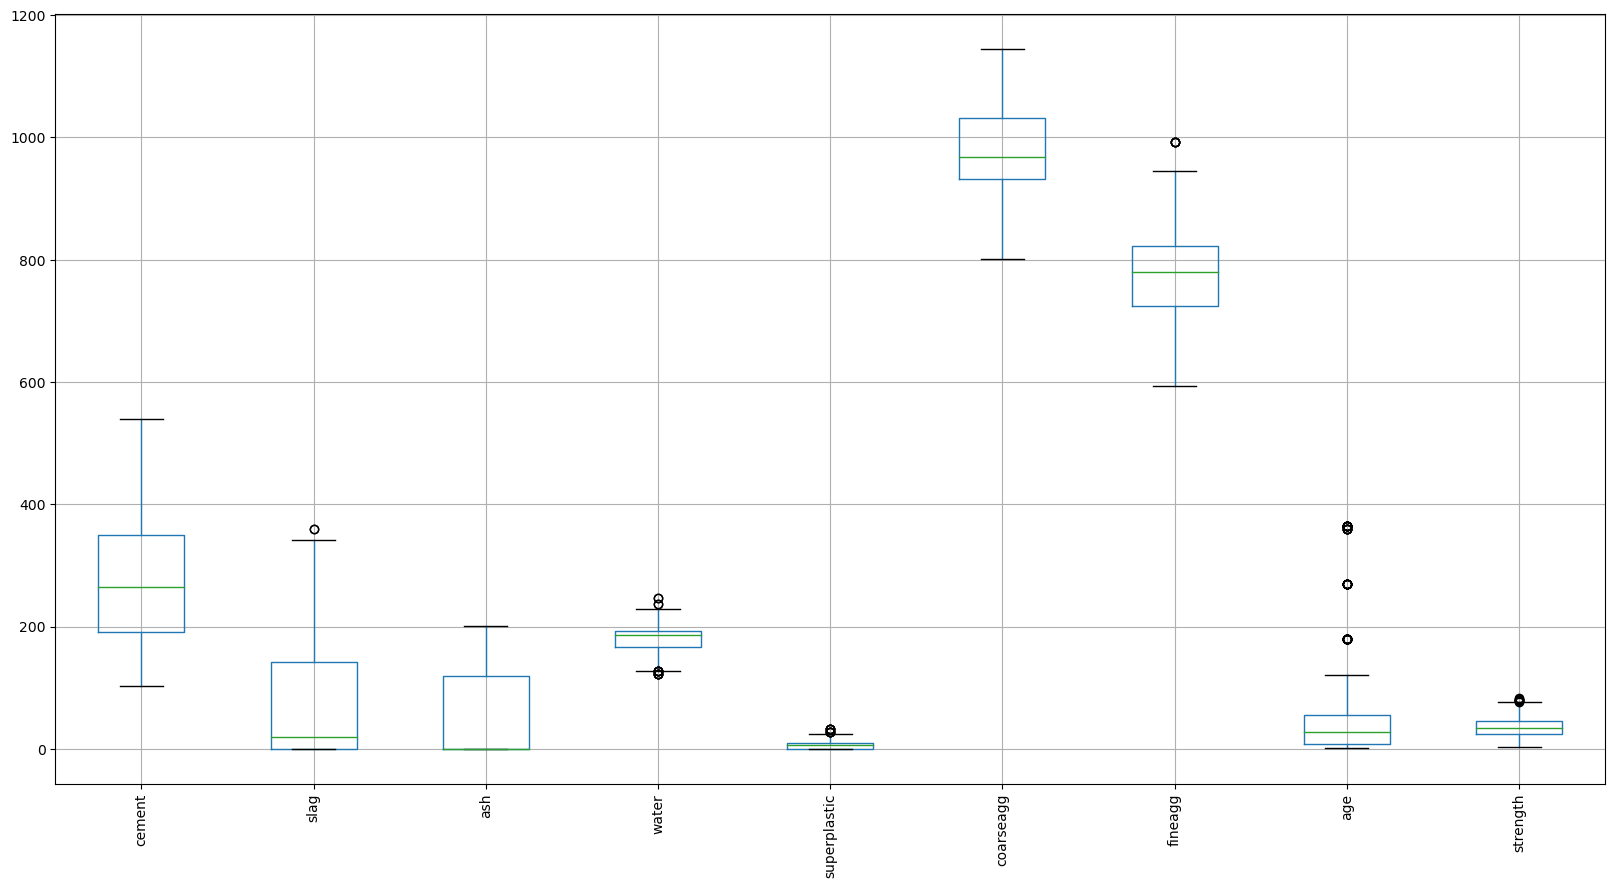

In [13]:
#Check For Outlier Detection
construction.boxplot(column = ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'], rot=90, figsize = (20,10));

In [14]:
con_outliers = pd.DataFrame(construction.loc[:,])

# Calculating Inter-Quartile Range
Q1 = con_outliers.quantile(0.25)
Q3 = con_outliers.quantile(0.75)
IQR = Q3 - Q1

print(IQR)

cement         158.3000000
slag           142.5000000
ash            118.3000000
water           26.3000000
superplastic    10.0000000
coarseagg       99.0000000
fineagg         97.9000000
age             49.0000000
strength        21.3500000
dtype: float64


In [15]:
construction.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

In [16]:
for i, j in zip(np.where(con_outliers > Q3 + 1.5 * IQR)[0], np.where(con_outliers > Q3 + 1.5 * IQR)[1]):
    
    whisker  = Q3 + 1.5 * IQR
    con_outliers.iloc[i,j] = whisker[j]
for i, j in zip(np.where(con_outliers < Q1 - 1.5 * IQR)[0], np.where(con_outliers < Q1 - 1.5 * IQR)[1]): 
    
    whisker  = Q1 - 1.5 * IQR
    con_outliers.iloc[i,j] = whisker[j]

In [17]:
# Remove outliers columns - 'water', 'superplastic', 'fineagg', 'age', 'water' and 'strength'
construction.drop(columns = construction.loc[:,], inplace = True)

In [18]:
construction = pd.concat([construction, con_outliers], axis = 1)

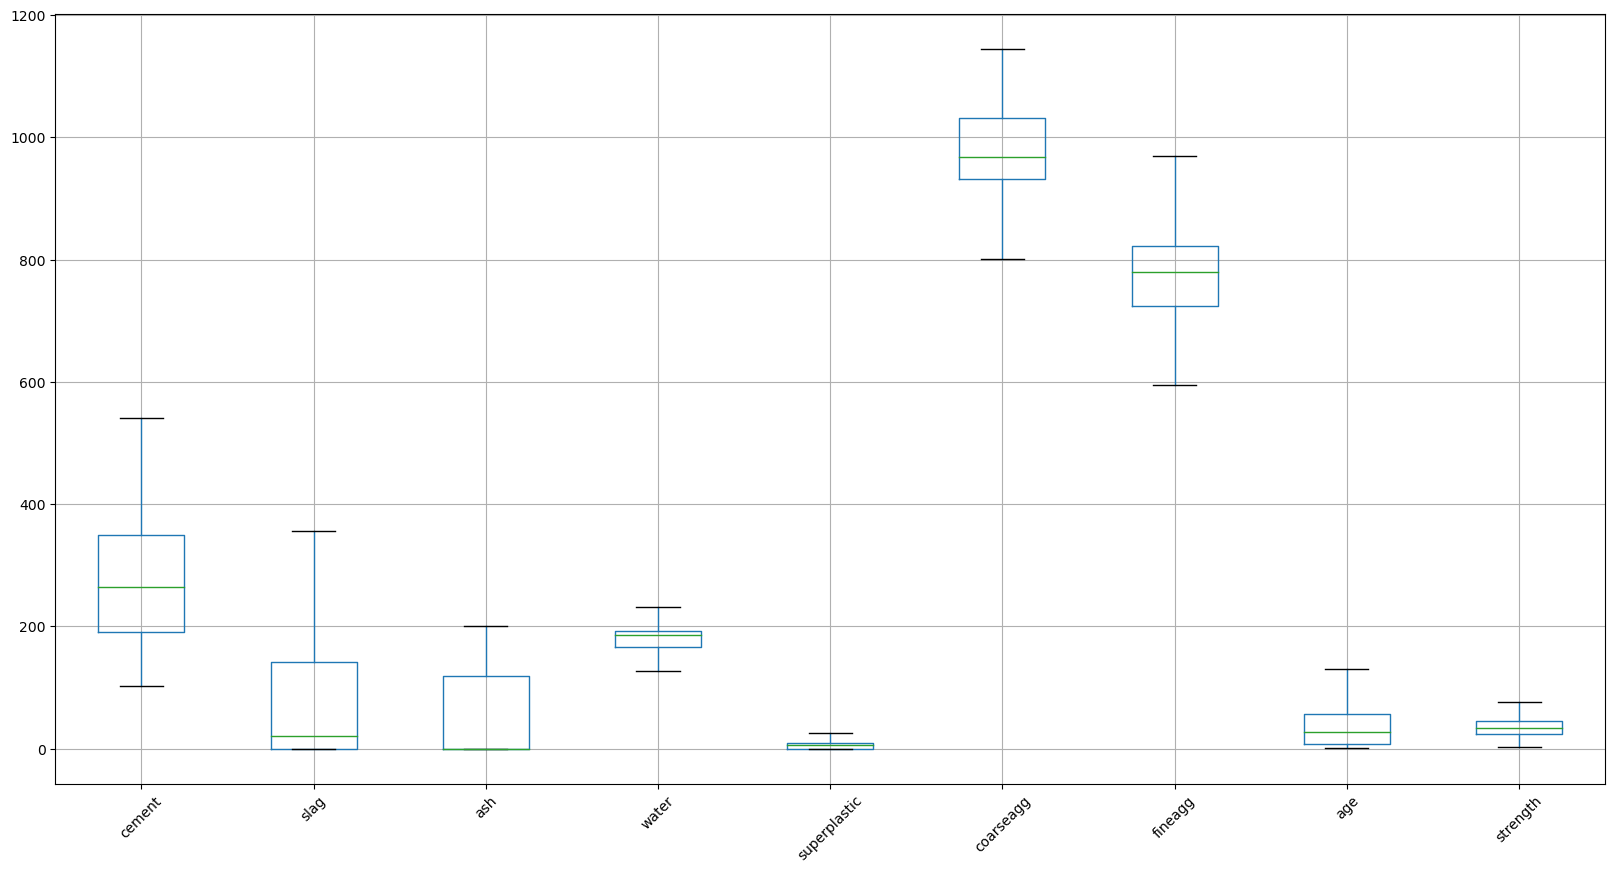

In [19]:
#Checking Outliers After Correction

construction.boxplot(column = ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'], rot=45, figsize = (20,10));

#Looking at the above plot, there are no more outliers in concrete data set

In [20]:
construction.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [21]:
con_missval = construction.copy()
isduplicates = False

for x in con_missval.columns:
    con_missval[x] = con_missval[x].astype(str).str.replace(".", "")
    result = con_missval[x].astype(str).str.isalnum() 
    if False in result.unique():
        isduplicates = True
        print('For column "{}" unique values are {}'.format(x, con_missval[x].unique()))
        print('\n')
        
if not isduplicates:
    print('No duplicates in this dataset')

No duplicates in this dataset


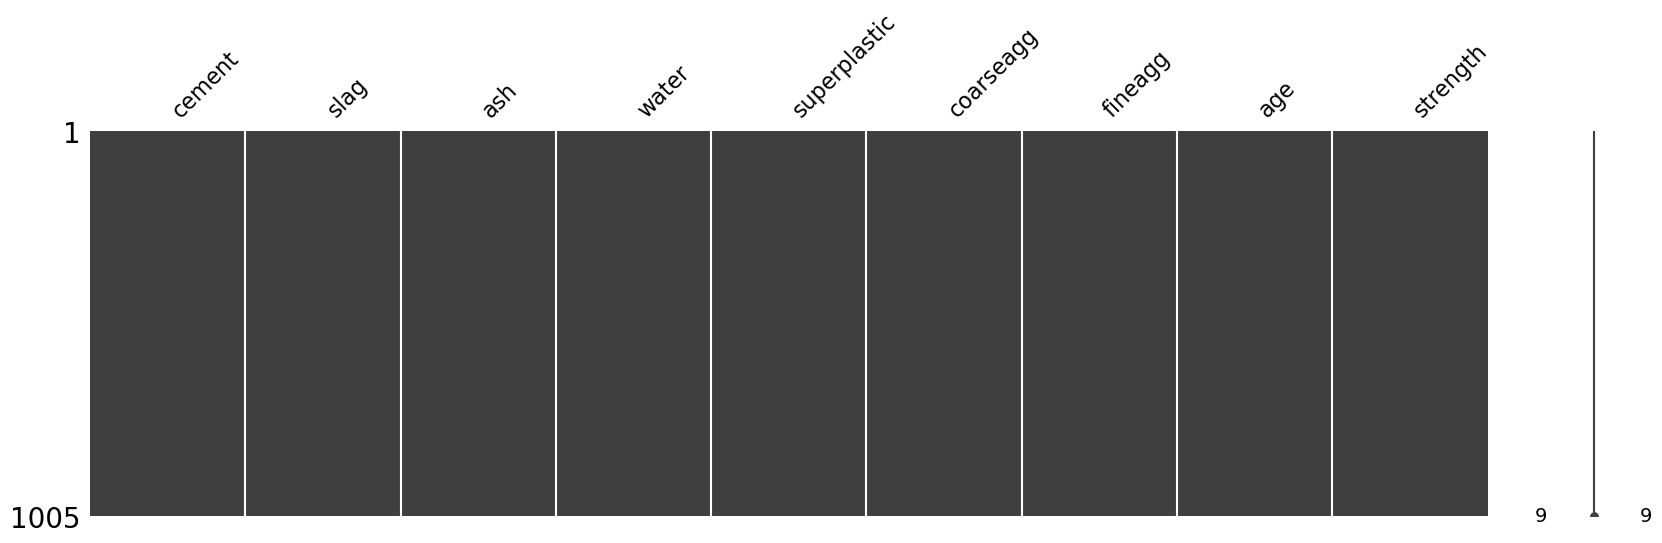

In [22]:
#Visualizing Missing Values
mno.matrix(construction, figsize = (20, 5));


In [23]:
construction.describe().T
#Overall Stats Summary

,count,mean,std,min,25%,50%,75%,max
cement,1005.0000000,278.6313433,104.3442607,102.0000000,190.7000000,265.0000000,349.0000000,540.0000000
slag,1005.0000000,72.0372139,86.1499938,0.0000000,0.0000000,20.0000000,142.5000000,356.2500000
ash,1005.0000000,55.5363184,64.2079686,0.0000000,0.0000000,0.0000000,118.3000000,200.1000000
water,1005.0000000,182.0668159,21.1586448,127.1500000,166.6000000,185.7000000,192.9000000,232.3500000
superplastic,1005.0000000,5.9814925,5.7244631,0.0000000,0.0000000,6.1000000,10.0000000,25.0000000
coarseagg,1005.0000000,974.3768159,77.5796667,801.0000000,932.0000000,968.0000000,1031.0000000,1145.0000000
fineagg,1005.0000000,772.5710945,80.0359343,594.0000000,724.3000000,780.0000000,822.2000000,969.0500000
age,1005.0000000,38.0761194,35.8625492,1.0000000,7.0000000,28.0000000,56.0000000,129.5000000
strength,1005.0000000,35.2263184,16.2202533,2.3300000,23.5200000,33.8000000,44.8700000,76.8950000


Data Cleaning Summary

1.We had 25 duplicate instances in dataset and dropped those duplicates.
2.We had outliers in 'Water', 'Superplastic', 'Fineagg', 'Age' and 'Strength' column also, handled these outliers by replacing every outlier with upper side of the whisker.
3.We had outliers in 'Water' column also, handled these outliers by replacing every outlier with lower side of the whisker.
4.No missing values in dataset.

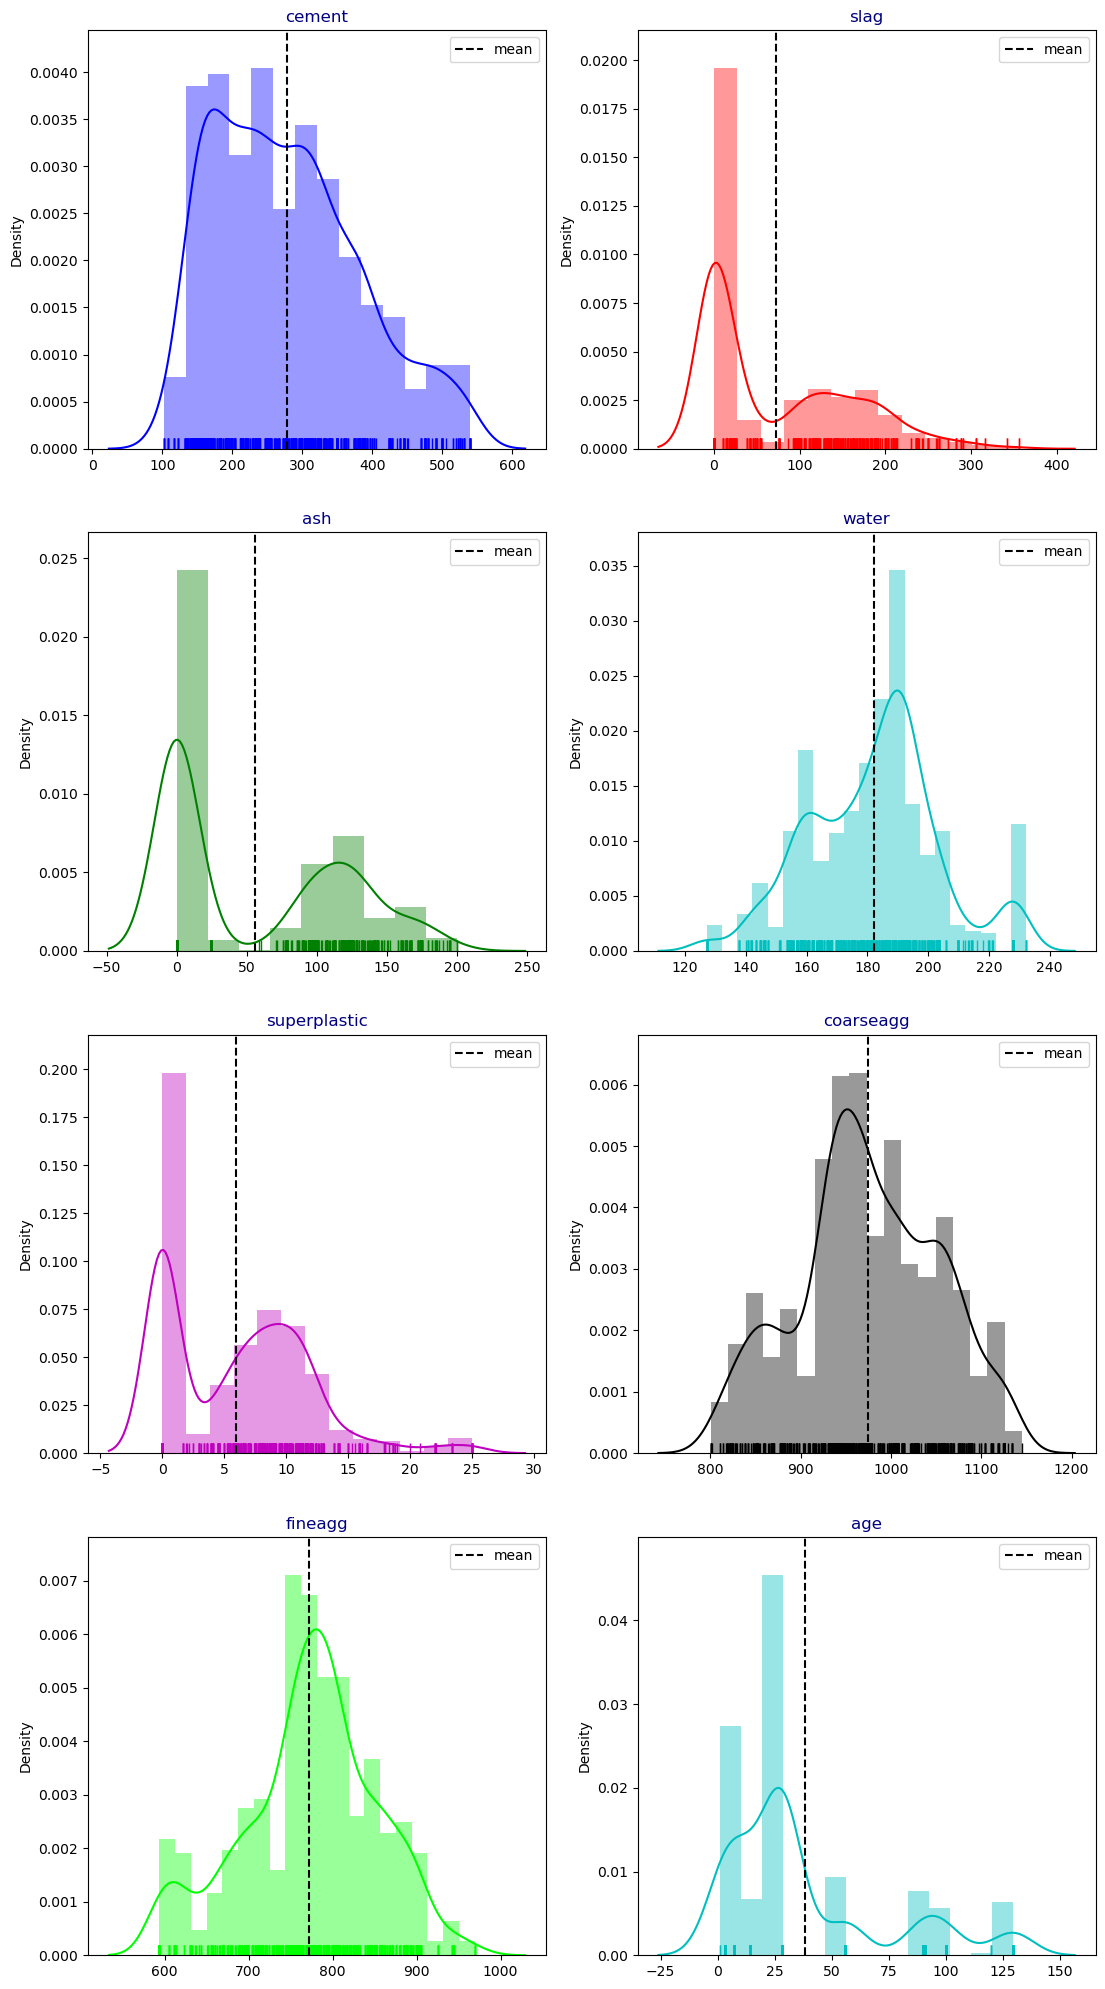

In [24]:
#Univariate Analysis

cols = [i for i in construction.columns if i not in 'strength']
length = len(cols)
cs = ["b","r","g","c","m","k","lime","c"]
fig = plt.figure(figsize=(13,25))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(4,2,j+1)
    ax = sns.distplot(construction[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(construction[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")

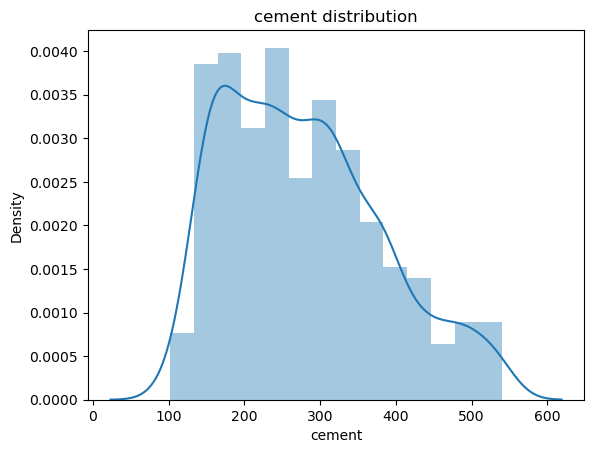

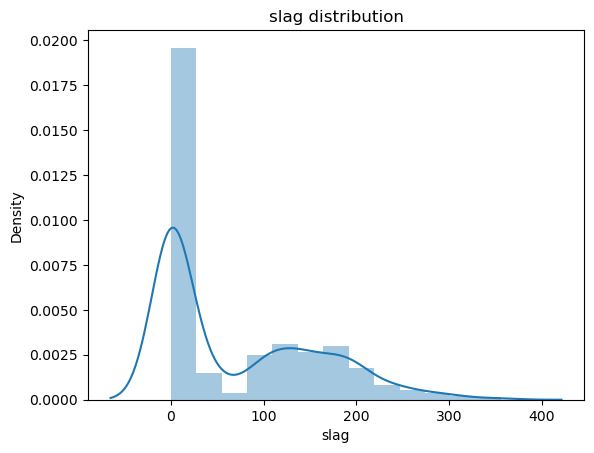

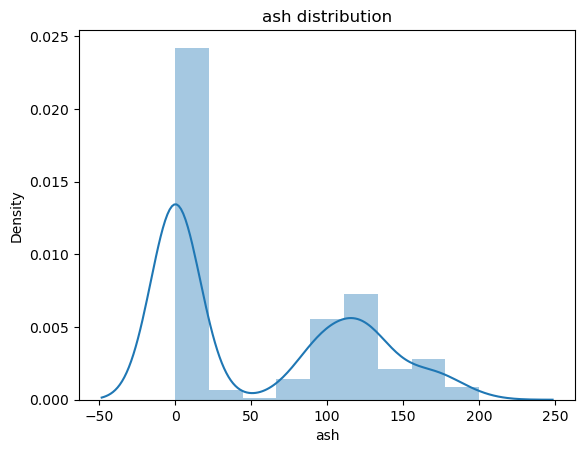

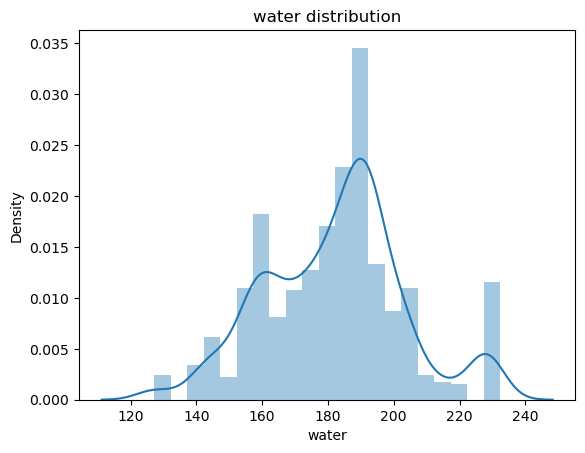

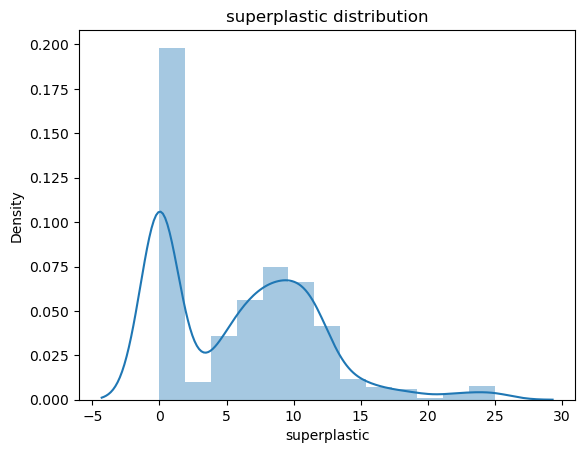

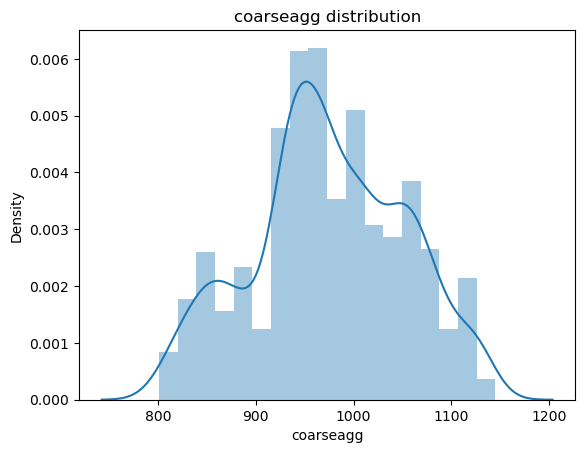

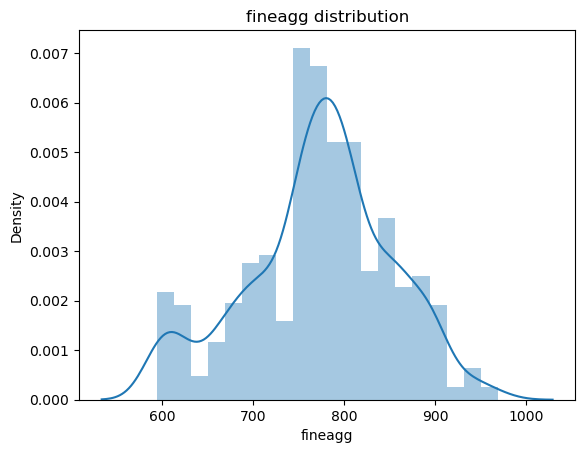

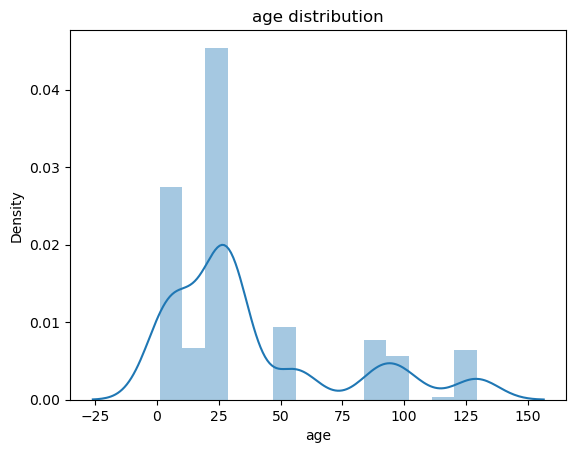

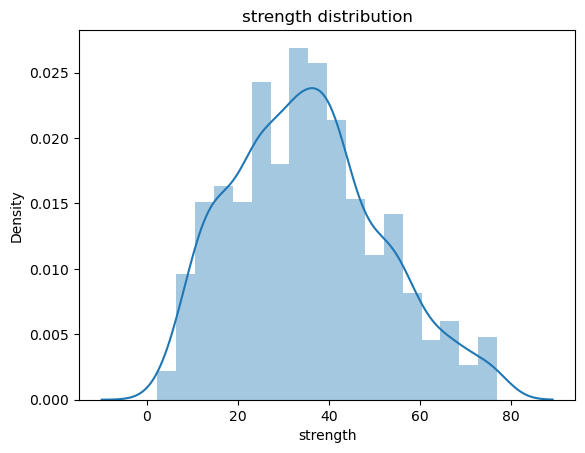

In [25]:
for x in construction:
    sns.distplot(construction[x]);
    plt.title("{} distribution".format(x))
    plt.show() 

Univariate analysis:

1.Cement column - Right skewed distribution -- cement is skewed to higher values
2.Slag column - Right skewed distribution -- slag is skewed to higher values and there are two gaussians
3.Ash column - Right skewed distribution -- ash is skewed to higher values and there are two gaussians
4.Water column - Moderately left skewed distribution
5.Superplastic column - Right skewed distribution -- superplastic is skewed to higher values and there are two gaussians
6.Coarseagg column - Moderately left skewed distribution
7.Fineagg column - Moderately left skewed distribution
8.Age column - Right skewed distribution -- age is skewed to higher values and there are five gaussians

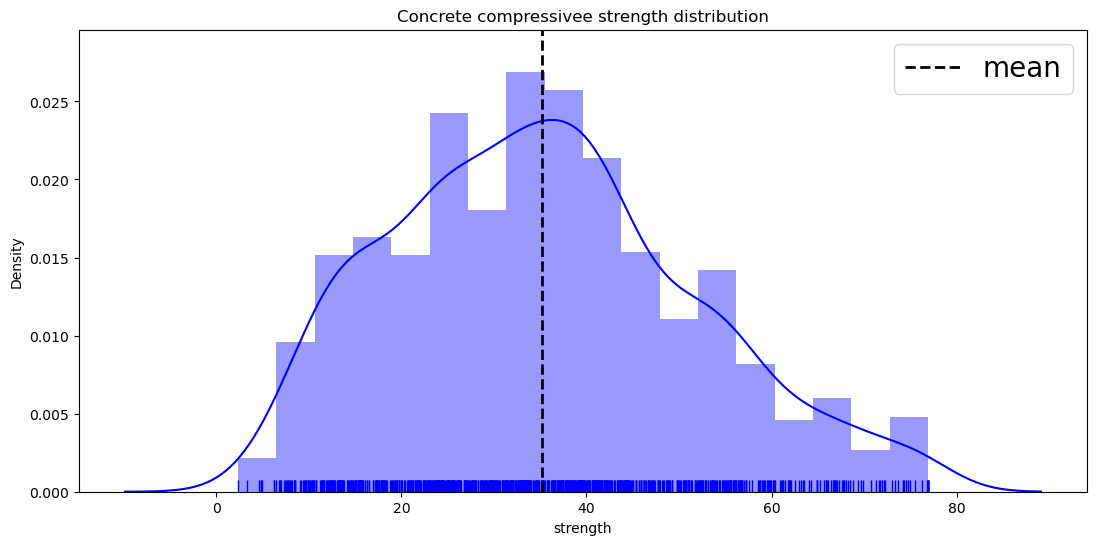

In [26]:
plt.figure(figsize=(13,6))
sns.distplot(construction["strength"],color="b",rug=True)
plt.axvline(construction["strength"].mean(), linestyle="dashed",color="k", label='mean',linewidth=2)
plt.legend(loc="best",prop={"size":20})
plt.title("Concrete compressivee strength distribution")
plt.show()

In [27]:
construction.describe().T
#Overall Stats Summary(2)

,count,mean,std,min,25%,50%,75%,max
cement,1005.0000000,278.6313433,104.3442607,102.0000000,190.7000000,265.0000000,349.0000000,540.0000000
slag,1005.0000000,72.0372139,86.1499938,0.0000000,0.0000000,20.0000000,142.5000000,356.2500000
ash,1005.0000000,55.5363184,64.2079686,0.0000000,0.0000000,0.0000000,118.3000000,200.1000000
water,1005.0000000,182.0668159,21.1586448,127.1500000,166.6000000,185.7000000,192.9000000,232.3500000
superplastic,1005.0000000,5.9814925,5.7244631,0.0000000,0.0000000,6.1000000,10.0000000,25.0000000
coarseagg,1005.0000000,974.3768159,77.5796667,801.0000000,932.0000000,968.0000000,1031.0000000,1145.0000000
fineagg,1005.0000000,772.5710945,80.0359343,594.0000000,724.3000000,780.0000000,822.2000000,969.0500000
age,1005.0000000,38.0761194,35.8625492,1.0000000,7.0000000,28.0000000,56.0000000,129.5000000
strength,1005.0000000,35.2263184,16.2202533,2.3300000,23.5200000,33.8000000,44.8700000,76.8950000


The above output prints the important summary statistics of all the numeric variables like the mean, median (50%), minimum, and maximum values, along with the standard deviation.

1.cement column - Right skewed distribution -- cement is skewed to higher values
2.slag column - Right skewed distribution -- slag is skewed to higher values and there are two gaussians
3.ash column - Right skewed distribution -- ash is skewed to higher values and there are two gaussians
4.water column - Moderately left skewed distribution
5.superplastic column - Right skewed distribution -- superplastic is skewed to higher values and there are two gaussians
6.coarseagg column - Moderately left skewed distribution
7.fineagg column - Moderately left skewed distribution
8.age column - Right skewed distribution -- age is skewed to higher values and there are five gaussians
9.strength column - Moderately right skewed distribution

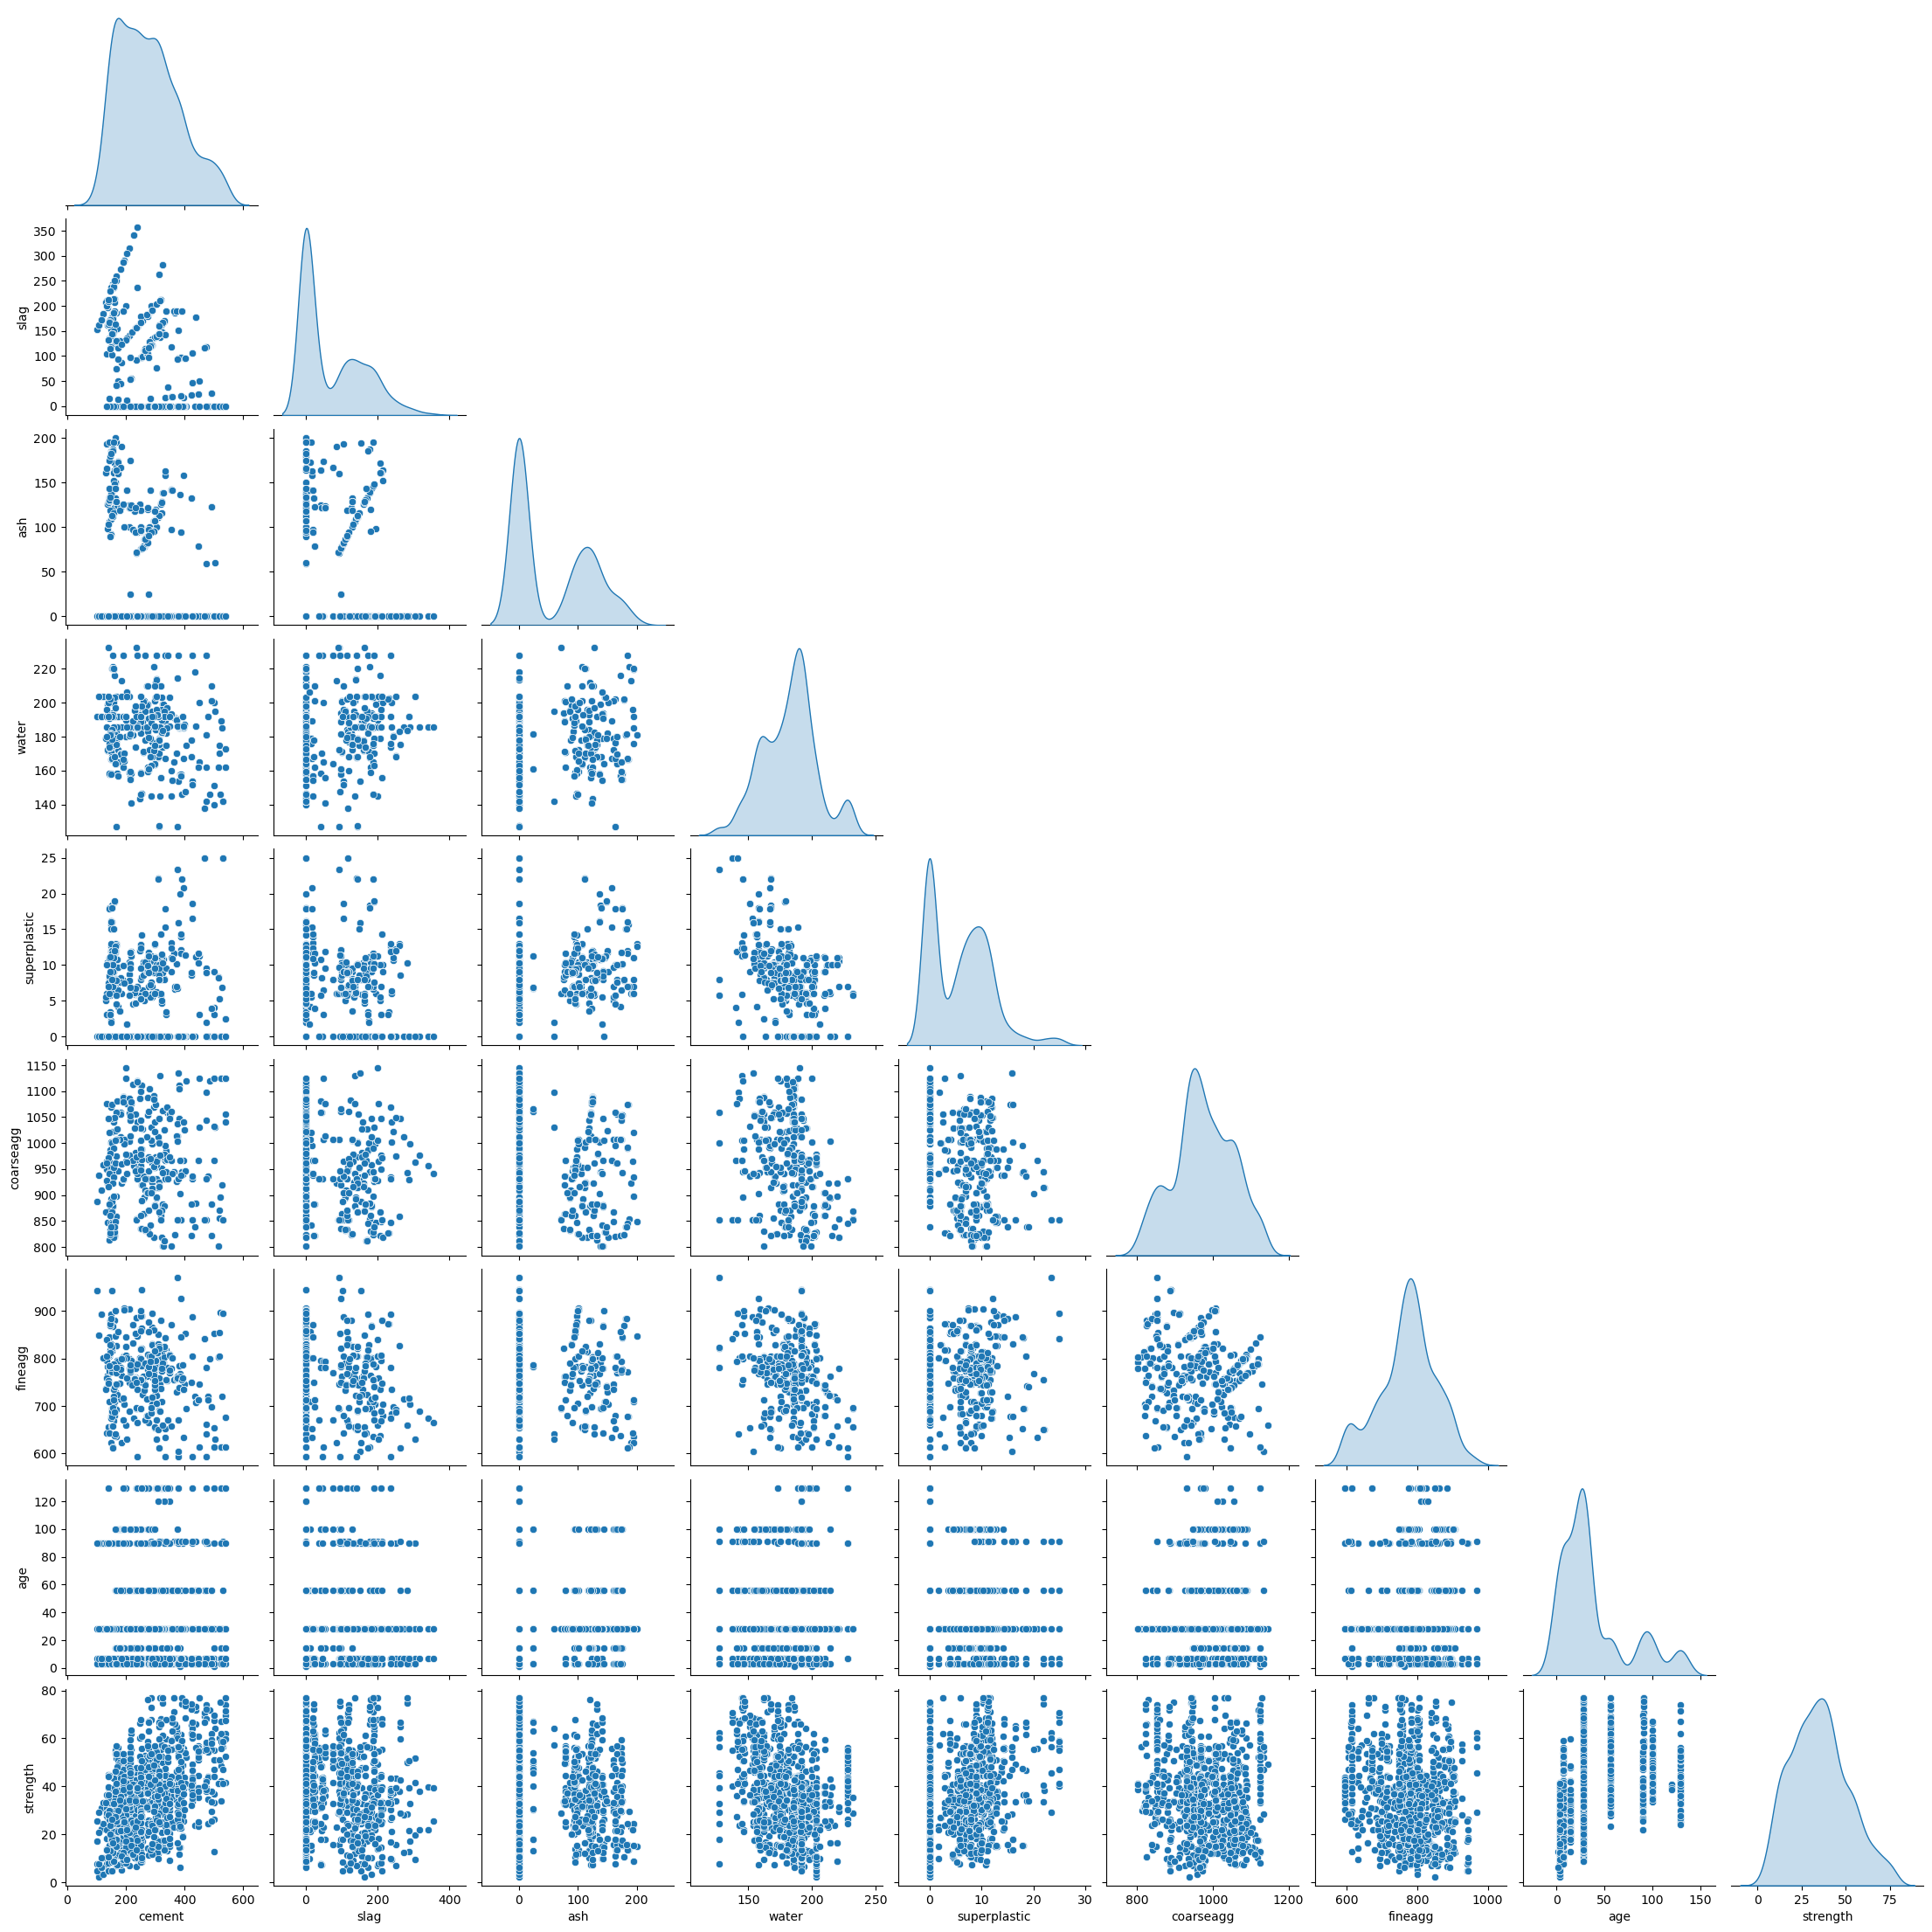

In [28]:
#Time For Multivariate Analysis
sns.pairplot(construction, diag_kind = 'kde', corner = True);

In [29]:
construction.corr()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.0000000,-0.3033700,-0.3856098,-0.0572088,0.0448168,-0.0862053,-0.2476623,0.0556490,0.4886896
slag,-0.3033700,1.0000000,-0.3123648,0.1302267,0.0196023,-0.2775952,-0.2911288,-0.0546345,0.1024400
ash,-0.3856098,-0.3123648,1.0000000,-0.2845415,0.4361848,-0.0264685,0.0918726,-0.0946261,-0.0796849
water,-0.0572088,0.1302267,-0.2845415,1.0000000,-0.6560121,-0.2103993,-0.4441919,0.1945588,-0.2713811
superplastic,0.0448168,0.0196023,0.4361848,-0.6560121,1.0000000,-0.2357154,0.2019397,-0.1275331,0.3429833
coarseagg,-0.0862053,-0.2775952,-0.0264685,-0.2103993,-0.2357154,1.0000000,-0.1604944,0.0127844,-0.1457945
fineagg,-0.2476623,-0.2911288,0.0918726,-0.4441919,0.2019397,-0.1604944,1.0000000,-0.0979334,-0.1885092
age,0.0556490,-0.0546345,-0.0946261,0.1945588,-0.1275331,0.0127844,-0.0979334,1.0000000,0.4767263
strength,0.4886896,0.1024400,-0.0796849,-0.2713811,0.3429833,-0.1457945,-0.1885092,0.4767263,1.0000000


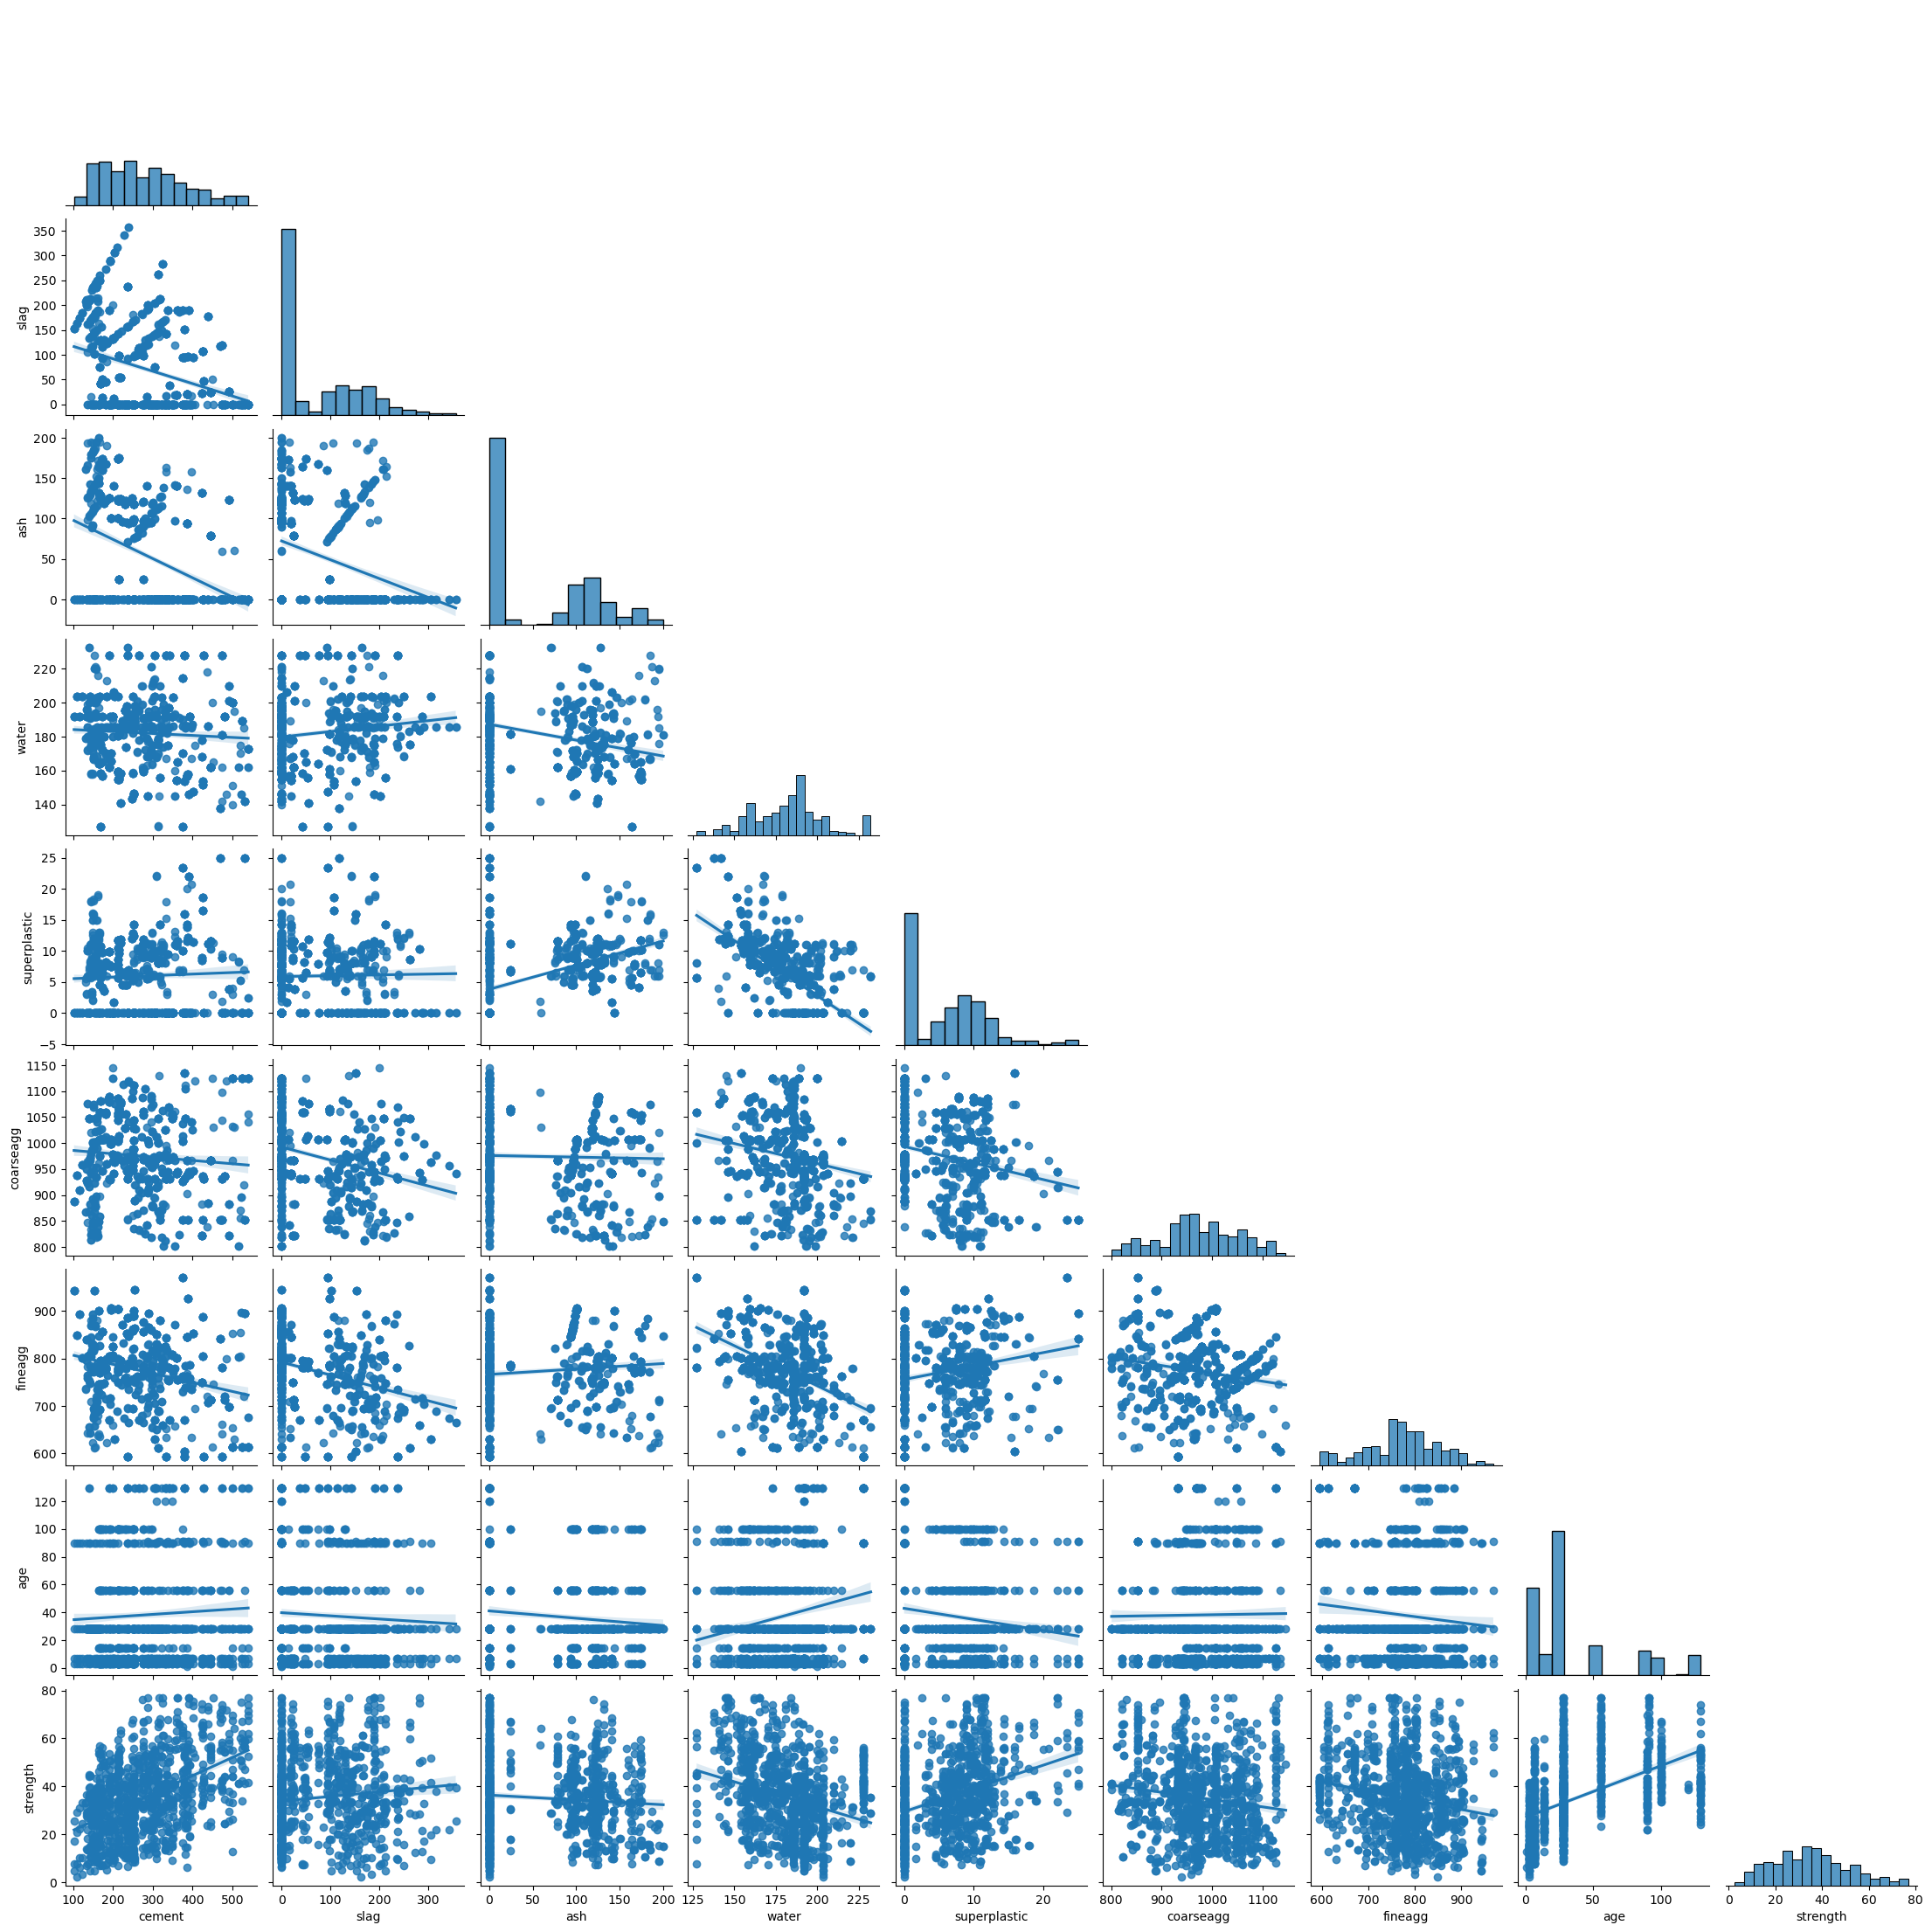

In [30]:
#Pairplot For Checking The Correlation

sns.pairplot(construction[['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength']], kind = 'reg', corner = True);


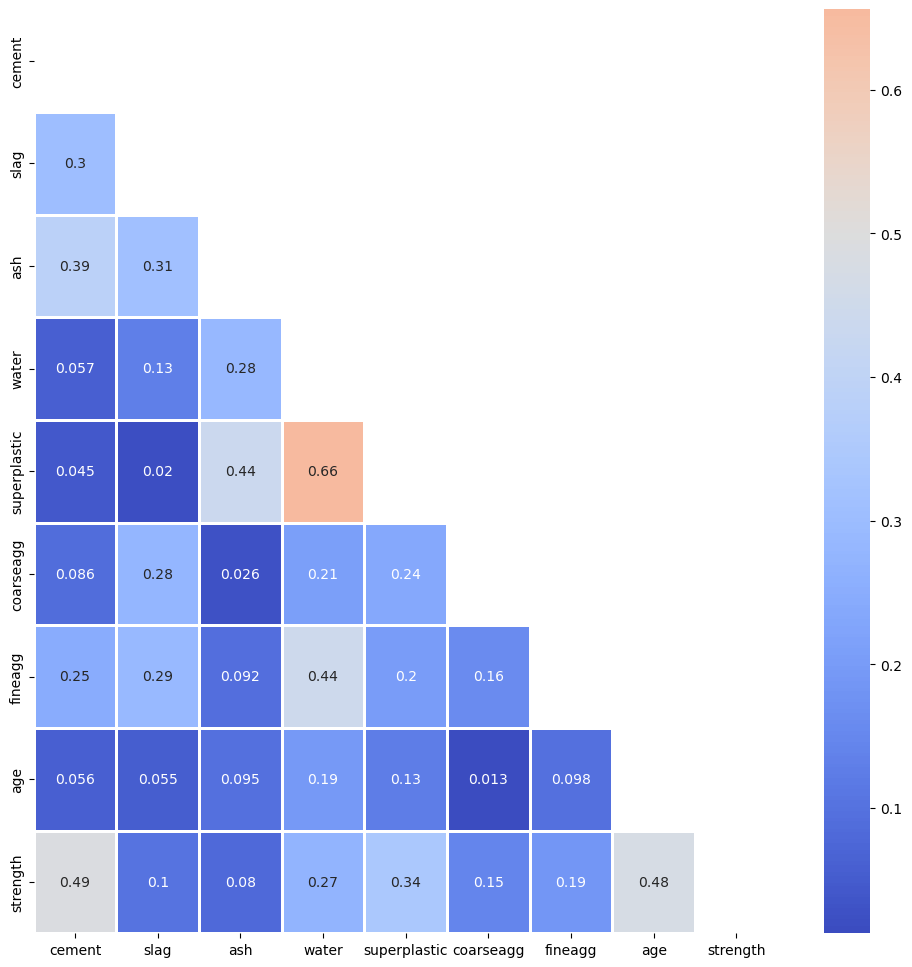

In [31]:
corr = abs(construction.corr()) 
lower_triangle = np.tril(corr, k = -1)  
mask = lower_triangle == 0 

plt.figure(figsize = (12,12))
sns.heatmap(lower_triangle, center = 0.5, cmap = 'coolwarm', annot= True, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= True, linewidths= 1, mask = mask) 
plt.show()

Prime Observations:
1.Looking at the Correlation table; 'Cement', 'Water', 'Superplastic' and 'Age' features are influencing the concrete strength.
2.Concrete strength feature is having Moderate Positive Correlation with Cement feature.
3.Concrete strength feature is having Low Positive Correlation with Superplastic and Age features
4.Concrete strength feature is having Low Positive Correlation with Water features
5.Concrete strength feature is having negligible Correlation with Slag, Ash, Coarseagg and Fineagg features
6.Water feature is having Moderate Positive Correlation with Superplastic feature
7.Concrete cement feature is having Low Positive Correlation with Slag and Ash features
8.Concrete fineagg feature is having Low Positive Correlation with Water feature
9.Concrete ash feature is having Low Positive Correlation with Superplastic feature

Exploratory Data Analysis(EDA)
1.Except 'Cement', 'Water', 'Superplastic' and 'Age' features, all other features are having very weak relationship with concrete 'Strength' feature and does not account for making statistical decision (of correlation).
2.Concrete Cement feature is having Low Positive Correlation with Slag and Ash features, perhaps we can create additional features like (cement + slag) and (cement + ash) to predict the concrete strength.
3.Concrete Fineagg feature is having Low Positive Correlation with Water feature, perhaps we can create additional features like (water + fineagg) to predict the concrete strength.
4.Concrete Ash feature is having Low Positive Correlation with Superplastic feature, perhaps we can create additional features like (ash + Superplastic) to predict the concrete strength.
5.Range of clusters in this dataset is 2 to 6

In [32]:
import matplotlib.gridspec as gridspec
sns.set(style='white')
sns.set(style='whitegrid',color_codes=True)

In [33]:
X = construction.drop(['strength'], axis = 1)
y = construction['strength']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)

In [35]:
print('X_train shape : ({0},{1})'.format(X_train.shape[0], X_train.shape[1]))
print('y_train shape : ({0},)'.format(y_train.shape[0]))
print('X_test shape : ({0},{1})'.format(X_test.shape[0], X_test.shape[1]))
print('y_test shape : ({0},)'.format(y_test.shape[0]))

X_train shape : (703,8)
y_train shape : (703,)
X_test shape : (302,8)
y_test shape : (302,)


In [36]:
def train_test_model(model, method, X_train, X_test, y_train, y_test, of_type, index, scale):
    print (model)
    print ("***************************************************************************")
    if scale == 'yes':
        pipeline = Pipeline([('scaler', PowerTransformer()), ('model', model)])
    elif scale == 'no':
        pipeline = Pipeline([('model', model)])

    pipeline.fit(X_train, y_train)
    prediction = pipeline.predict(X_test)

    r2 = metrics.r2_score(y_test, prediction) 
    rmse = np.sqrt(metrics.mean_squared_error(y_test, prediction))
    
    if of_type == "coef":
        print("The intercept for our model is {}".format(model.intercept_), "\n")
    for idx, col_name in enumerate(X_train.columns):
        print("The coefficient for {} is {}".format((col_name),model.coef_.ravel()[idx]))
    train_accuracy_score = pipeline.score(X_train, y_train)
    test_accuracy_score = pipeline.score(X_test, y_test)
    
    print ("***************************************************************************")
    
    if of_type == "coef":
        plt.figure(figsize=(13,12))
        plt.subplot(211)
        print(model.coef_)
        coef = pd.DataFrame(np.sort(model.coef_)[::-1].ravel())
        coef["feat"] = X_train.columns
        #ax1 = sns.barplot(rr = Ridge(random_state = 1))
        ax1 = sns.barplot(coef[0],palette="jet_r",linewidth=2)
        ax1.set_facecolor("lightgrey")
        ax1.axhline(0,color="k",linewidth=2)
        plt.ylabel("coefficients")
        plt.xlabel("features")
        plt.title(method + ' ' + 'FEATURE IMPORTANCES')
    
    elif of_type == "feat":
        plt.figure(figsize=(13,12))
        plt.subplot(211)
        coef = pd.DataFrame(np.sort(model.feature_importances_)[::-1])
        coef["feat"] = X_train.columns
        ax2 = sns.barplot(coef["feat"],coef[0],palette="jet_r",linewidth=2)
        ax2.set_facecolor("lightgrey")
        ax2.axhline(0,color="k",linewidth=2)
        plt.ylabel("coefficients")
        plt.xlabel("features")
        plt.title(method + ' ' + 'FEATURE IMPORTANCES')
    resultsDf = pd.DataFrame({'Method': method, 'R Squared': r2, 'RMSE': rmse, 'Train Accuracy': train_accuracy_score, 
                              'Test Accuracy': test_accuracy_score}, index=[index])
    return resultsDf  

In [37]:
def train_test_allmodels(X_train_common, X_test_common, y_train, y_test, scale):
    models=[['LinearRegression',LinearRegression()],
        ['Ridge',Ridge(random_state = 1)],
        ['Lasso',Lasso(random_state = 1)],
        ['KNeighborsRegressor',KNeighborsRegressor(n_neighbors = 3)],
        ['SVR',SVR(kernel = 'linear')],
        ['RandomForestRegressor',RandomForestRegressor(random_state = 1)],
        ['BaggingRegressor',BaggingRegressor(random_state = 1)],
        ['ExtraTreesRegressor',ExtraTreesRegressor(random_state = 1)],
        ['AdaBoostRegressor',AdaBoostRegressor(random_state = 1)],
        ['GradientBoostingRegressor',GradientBoostingRegressor(random_state = 1)],
        ['CatBoostRegressor',CatBoostRegressor(random_state = 1, verbose=False)],
        ['XGBRegressor',XGBRegressor()]
    ]

    resultsDf_common = pd.DataFrame()
    i = 1
    for name, regressor in models:
        reg_resultsDf = train_test_model(regressor, name, X_train_common, X_test_common, y_train, y_test, 'none', i, scale)
        resultsDf_common = pd.concat([resultsDf_common, reg_resultsDf])
        i = i+1

    return resultsDf_common

In [38]:
def hyperparameterstune_model(name, model, X_train, y_train, param_grid):
    
    start = time.time()
    cv = KFold(n_splits=10, random_state=1)
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, 
                                     scoring = 'neg_root_mean_squared_error', error_score=0)
    model_grid_result = grid_search.fit(X_train, y_train)
    print(name, "- Least: RMSE %f using %s" % (model_grid_result.best_score_ * (-1), model_grid_result.best_params_)) 
    end = time.time()  
    duration = end - start  
    print("Total duration" , duration, "\n")
    return model_grid_result.best_estimator_

In [39]:
lr = LinearRegression()
resultsDf = train_test_model(lr, 'LinearRegression', X_train, X_test, y_train, y_test, 'none', 1, 'no')
resultsDf

LinearRegression()
***************************************************************************
The coefficient for cement is 0.1198722673040892
The coefficient for slag is 0.09939485229610173
The coefficient for ash is 0.08031641374762029
The coefficient for water is -0.1631540563786189
The coefficient for superplastic is 0.2528111260073266
The coefficient for coarseagg is 0.01009276943772331
The coefficient for fineagg is 0.018080101560133562
The coefficient for age is 0.24465447254599182
***************************************************************************


,Method,R Squared,RMSE,Train Accuracy,Test Accuracy
1,LinearRegression,0.6773100,8.6594171,0.7351817,0.6773100


In [40]:
con_train = pd.concat([X_train, y_train], axis=1)
con_train.head()

lr_ols = smf.ols(formula= 'strength ~ cement + slag + ash + water + superplastic + coarseagg + fineagg + age', 
              data = con_train).fit()

print(lr_ols.summary())

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     240.8
Date:                Tue, 19 Sep 2023   Prob (F-statistic):          1.64e-194
Time:                        02:18:58   Log-Likelihood:                -2504.8
No. Observations:                 703   AIC:                             5028.
Df Residuals:                     694   BIC:                             5069.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -14.8322     26.312     -0.564   

Ridge(random_state=1)
***************************************************************************
The intercept for our model is 35.7481081081081 

The coefficient for cement is 9.151883202948783
The coefficient for slag is 4.945802713607869
The coefficient for ash is 0.8032160942278228
The coefficient for water is -4.95858367018565
The coefficient for superplastic is 1.764595131472646
The coefficient for coarseagg is -0.672072835029186
The coefficient for fineagg is -1.3447817493216072
The coefficient for age is 9.783883153856841
***************************************************************************
[ 9.1518832   4.94580271  0.80321609 -4.95858367  1.76459513 -0.67207284
 -1.34478175  9.78388315]


,Method,R Squared,RMSE,Train Accuracy,Test Accuracy
1,LinearRegression,0.6773100,8.6594171,0.7351817,0.6773100
1,Ridge,0.8024547,6.7753115,0.8119030,0.8024547


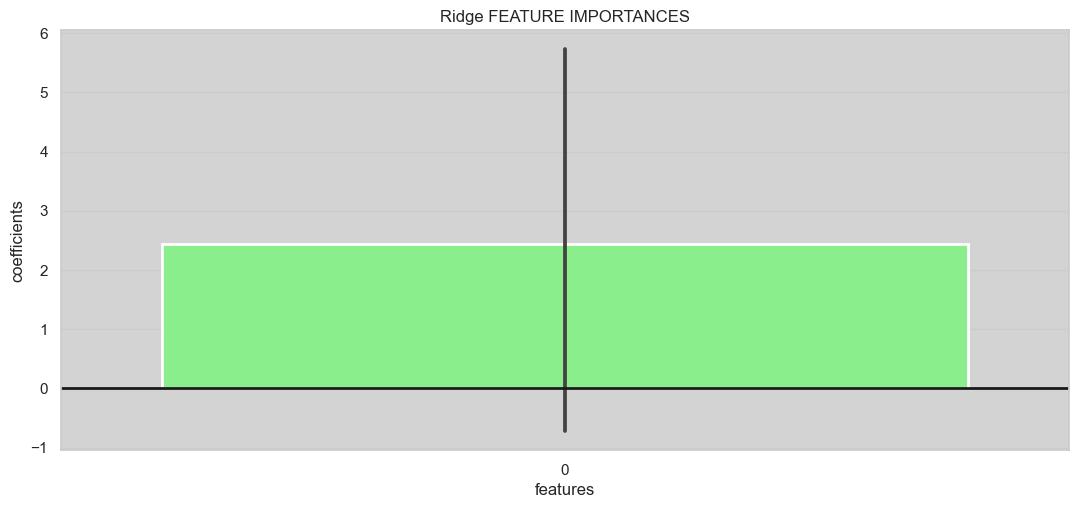

In [41]:
rr = Ridge(random_state = 1)
rr_resultsDf = train_test_model(rr, 'Ridge', X_train, X_test, y_train, y_test,'coef',1, 'yes')
resultsDf = pd.concat([resultsDf,rr_resultsDf])
resultsDf

Lasso(random_state=1)
***************************************************************************
The intercept for our model is 35.74810810810809 

The coefficient for cement is 8.179556910616604
The coefficient for slag is 3.9520456863238085
The coefficient for ash is 0.0
The coefficient for water is -2.841875929306002
The coefficient for superplastic is 2.5050520364133404
The coefficient for coarseagg is -0.0
The coefficient for fineagg is -0.0
The coefficient for age is 8.689840506066755
***************************************************************************
[ 8.17955691  3.95204569  0.         -2.84187593  2.50505204 -0.
 -0.          8.68984051]


,Method,R Squared,RMSE,Train Accuracy,Test Accuracy
1,LinearRegression,0.6773100,8.6594171,0.7351817,0.6773100
1,Ridge,0.8024547,6.7753115,0.8119030,0.8024547
3,Lasso,0.7668032,7.3613450,0.7894170,0.7668032


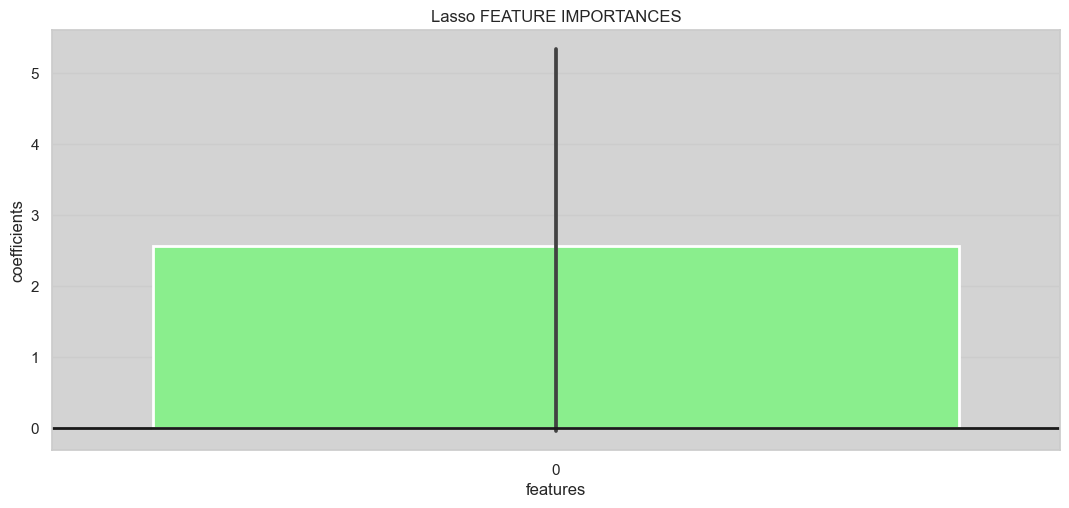

In [42]:
lasso = Lasso(random_state = 1)
lasso_resultsDf = train_test_model(lasso, 'Lasso', X_train, X_test, y_train, y_test, 'coef', 3, 'yes')
resultsDf = pd.concat([resultsDf, lasso_resultsDf])
resultsDf

In [43]:
pipe = Pipeline([('scaler', PowerTransformer()), ('polynomial', PolynomialFeatures(degree = 2, interaction_only=True))])
X_train_poly2 = pd.DataFrame(pipe.fit_transform(X_train))
X_test_poly2 = pd.DataFrame(pipe.fit_transform(X_test))

In [44]:
lr_resultsDf = train_test_model(lr, 'Linear Regression with interaction features', X_train_poly2, X_test_poly2, y_train, y_test, 
                                'none', 4, 'no')
resultsDf = pd.concat([resultsDf,lr_resultsDf])
resultsDf

LinearRegression()
***************************************************************************
The coefficient for 0 is 1.2213129816443482e-16
The coefficient for 1 is 11.325259089309558
The coefficient for 2 is 5.681338790440618
The coefficient for 3 is 2.257035120957608
The coefficient for 4 is -4.042787231677968
The coefficient for 5 is 1.3926934154701915
The coefficient for 6 is -0.7125368099979627
The coefficient for 7 is 0.029791522547950755
The coefficient for 8 is 10.251721385158724
The coefficient for 9 is -3.6153550845177174
The coefficient for 10 is -1.6690078942448243
The coefficient for 11 is -0.9360231529954511
The coefficient for 12 is 0.7526721735167667
The coefficient for 13 is -0.500841585599924
The coefficient for 14 is -0.3169624684041165
The coefficient for 15 is 0.3563230222192411
The coefficient for 16 is -3.1675677751918934
The coefficient for 17 is 0.661617087216009
The coefficient for 18 is 1.85892779467786
The coefficient for 19 is -1.640229765612705
The coef

,Method,R Squared,RMSE,Train Accuracy,Test Accuracy
1,LinearRegression,0.6773100,8.6594171,0.7351817,0.6773100
1,Ridge,0.8024547,6.7753115,0.8119030,0.8024547
3,Lasso,0.7668032,7.3613450,0.7894170,0.7668032
4,Linear Regression with interaction features,0.8341979,6.2071314,0.8636790,0.8341979


Ridge(random_state=1)
***************************************************************************
The intercept for our model is 34.50407865290032 

The coefficient for 0 is 0.0
The coefficient for 1 is 11.174897361822733
The coefficient for 2 is 5.562348705443984
The coefficient for 3 is 2.1659230709098334
The coefficient for 4 is -4.1122302727068
The coefficient for 5 is 1.397811015276193
The coefficient for 6 is -0.7829305614039336
The coefficient for 7 is -0.07948627739329049
The coefficient for 8 is 10.230458116647347
The coefficient for 9 is -3.4931453295991135
The coefficient for 10 is -1.5424810921775163
The coefficient for 11 is -0.910415687079907
The coefficient for 12 is 0.7355920771506017
The coefficient for 13 is -0.4547036332647231
The coefficient for 14 is -0.29266659765000663
The coefficient for 15 is 0.3557097532358012
The coefficient for 16 is -2.99284693913132
The coefficient for 17 is 0.6893287203064932
The coefficient for 18 is 1.8097076811581359
The coefficient fo

,Method,R Squared,RMSE,Train Accuracy,Test Accuracy
1,LinearRegression,0.6773100,8.6594171,0.7351817,0.6773100
1,Ridge,0.8024547,6.7753115,0.8119030,0.8024547
3,Lasso,0.7668032,7.3613450,0.7894170,0.7668032
4,Linear Regression with interaction features,0.8341979,6.2071314,0.8636790,0.8341979
5,Ridge with interaction features,0.8344728,6.2019836,0.8636596,0.8344728


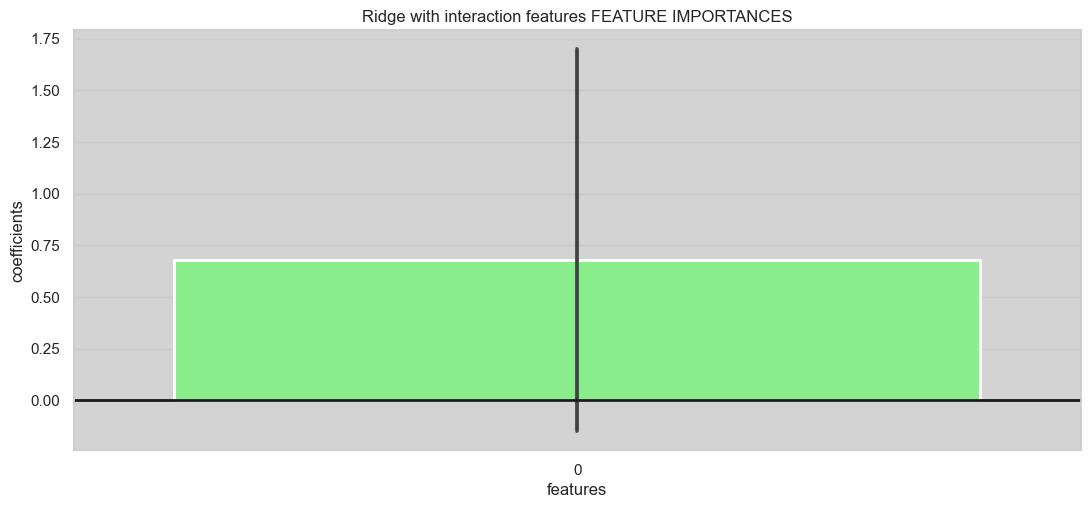

In [45]:
rr = Ridge(random_state = 1)
rr_resultsDf = train_test_model(rr, 'Ridge with interaction features', X_train_poly2, X_test_poly2, y_train, y_test, 'coef', 5, 'no')
resultsDf = pd.concat([resultsDf,rr_resultsDf])
resultsDf

Observation: Notice that test accuracy is better than Linear regression with interaction features. This model performs better on training set and performance drops on test set which shows that it's an overfitting and very complex model.

Lasso(random_state=1)
***************************************************************************
The intercept for our model is 36.147235506547844 

The coefficient for 0 is 0.0
The coefficient for 1 is 7.984549187744216
The coefficient for 2 is 3.7299372240399618
The coefficient for 3 is 0.0
The coefficient for 4 is -2.8292606164101484
The coefficient for 5 is 2.265733231277431
The coefficient for 6 is -0.0
The coefficient for 7 is -0.09518950902730734
The coefficient for 8 is 8.68694373682482
The coefficient for 9 is -0.0
The coefficient for 10 is -0.0
The coefficient for 11 is -0.0
The coefficient for 12 is 0.0
The coefficient for 13 is 0.0
The coefficient for 14 is -0.0
The coefficient for 15 is -0.0
The coefficient for 16 is -0.0
The coefficient for 17 is 0.0
The coefficient for 18 is 0.0
The coefficient for 19 is -0.0
The coefficient for 20 is 0.0
The coefficient for 21 is 0.0
The coefficient for 22 is 0.0
The coefficient for 23 is -0.6995556687617219
The coefficient for 24 is 0

,Method,R Squared,RMSE,Train Accuracy,Test Accuracy
1,LinearRegression,0.6773100,8.6594171,0.7351817,0.6773100
1,Ridge,0.8024547,6.7753115,0.8119030,0.8024547
3,Lasso,0.7668032,7.3613450,0.7894170,0.7668032
4,Linear Regression with interaction features,0.8341979,6.2071314,0.8636790,0.8341979
5,Ridge with interaction features,0.8344728,6.2019836,0.8636596,0.8344728
10,Lasso with interaction features,0.7541395,7.5585812,0.7908939,0.7541395


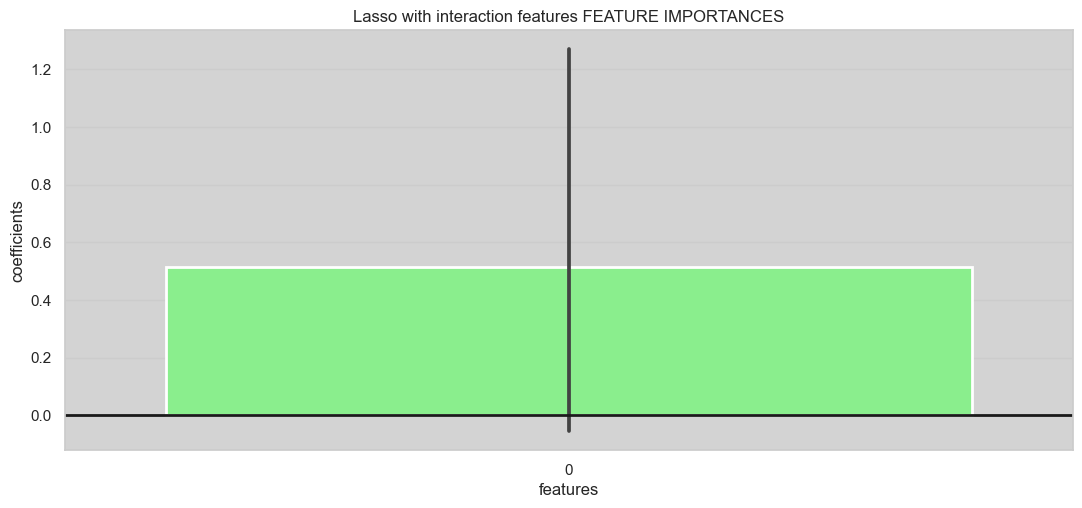

In [46]:
lasso = Lasso(random_state = 1)
lasso_resultsDf = train_test_model(lasso, 'Lasso with interaction features', X_train_poly2, X_test_poly2, y_train, y_test, 'coef', 10, 'no')
resultsDf = pd.concat([resultsDf, lasso_resultsDf])
resultsDf

Observation: This model performs better on training set and poorly on test set which shows that it's an overfitting and very complex model.

In [47]:
for i in range(1,6):
    pipe = Pipeline([('scaler', PowerTransformer()), ('polynomial', PolynomialFeatures(degree = i)), 
                 ('model', LinearRegression())])
    pipe.fit(X_train, y_train) 
    prediction = pipe.predict(X_test)

    r2 = metrics.r2_score(y_test, prediction)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, prediction))
    
    print ("R-Squared for {0} degree polynomial is {1}".format(i, r2))
    print ("ROOT MEAN SQUARED ERROR for {0} degree polynomial features is {1}".format(i, rmse),"\n")

R-Squared for 1 degree polynomial is 0.8024959875566798
ROOT MEAN SQUARED ERROR for 1 degree polynomial features is 6.774602795695374 

R-Squared for 2 degree polynomial is 0.869483206112709
ROOT MEAN SQUARED ERROR for 2 degree polynomial features is 5.5071774951808985 

R-Squared for 3 degree polynomial is 0.8396969000355692
ROOT MEAN SQUARED ERROR for 3 degree polynomial features is 6.103329768429958 

R-Squared for 4 degree polynomial is -29.586677744656907
ROOT MEAN SQUARED ERROR for 4 degree polynomial features is 84.30668817251896 

R-Squared for 5 degree polynomial is -2.651623403177359e+17
ROOT MEAN SQUARED ERROR for 5 degree polynomial features is 7849677189.95598 



RMSE is increasing from 1 degree polynomial which has 6.77 RMSE and RMSE came down to 5.50 for 2 degree polynomial features. Again from 3 degree polynomial RMSE is starts increasing hence optimal degree of polynomial is 2 degree polynomial.

In [48]:
pipe = Pipeline([('scaler', PowerTransformer()), ('polynomial', PolynomialFeatures(degree = 2)), 
                 ('model', LinearRegression())])
    
pipe.fit(X_train, y_train) 
prediction = pipe.predict(X_test) 
        
r2 = metrics.r2_score(y_test, prediction)
rmse = np.sqrt(metrics.mean_squared_error(y_test, prediction))

print ("R-Squared :", r2)
print ("ROOT MEAN SQUARED ERROR :", rmse)
print("Accuracy of Training data set: {0:.4f} %".format(pipe.score(X_train, y_train)))
accuracy_score = pipe.score(X_test, y_test)
print("Accuracy of Test data set: {0:.4f} %".format(accuracy_score))

R-Squared : 0.869483206112709
ROOT MEAN SQUARED ERROR : 5.5071774951808985
Accuracy of Training data set: 0.8807 %
Accuracy of Test data set: 0.8695 %


In [49]:
poly_resultsDf = pd.DataFrame({'Method': 'Linear Regression with Polynomial features', 'R Squared': r2, 'RMSE': rmse, 'Train Accuracy': pipe.score(X_train, y_train), 
                          'Test Accuracy': accuracy_score}, index=[7])
resultsDf = pd.concat([resultsDf, poly_resultsDf])
resultsDf

,Method,R Squared,RMSE,Train Accuracy,Test Accuracy
1,LinearRegression,0.6773100,8.6594171,0.7351817,0.6773100
1,Ridge,0.8024547,6.7753115,0.8119030,0.8024547
3,Lasso,0.7668032,7.3613450,0.7894170,0.7668032
4,Linear Regression with interaction features,0.8341979,6.2071314,0.8636790,0.8341979
5,Ridge with interaction features,0.8344728,6.2019836,0.8636596,0.8344728
10,Lasso with interaction features,0.7541395,7.5585812,0.7908939,0.7541395
7,Linear Regression with Polynomial features,0.8694832,5.5071775,0.8806901,0.8694832


In [50]:
pipe = Pipeline([('scaler', PowerTransformer()), ('polynomial', PolynomialFeatures(degree = 2))])
X_train_poly_2 = pd.DataFrame(pipe.fit_transform(X_train))
X_test_poly_2 = pd.DataFrame(pipe.fit_transform(X_test))

Ridge(random_state=1)
***************************************************************************
The intercept for our model is 22.726089946461535 

The coefficient for 0 is 0.0
The coefficient for 1 is 13.72814374048793
The coefficient for 2 is 8.128887782654312
The coefficient for 3 is 3.8685078325512854
The coefficient for 4 is -3.2680565241767146
The coefficient for 5 is -0.11176046702934275
The coefficient for 6 is 0.631981431130203
The coefficient for 7 is 1.7853973027620496
The coefficient for 8 is 9.920907418057693
The coefficient for 9 is 0.1981195955037047
The coefficient for 10 is -2.37168687318019
The coefficient for 11 is -0.7447509496488339
The coefficient for 12 is -3.1234924586885433
The coefficient for 13 is -0.7841786576213653
The coefficient for 14 is -1.5589343239835785
The coefficient for 15 is -1.7598653519466527
The coefficient for 16 is 0.6208537643813705
The coefficient for 17 is 8.684180722030801
The coefficient for 18 is -1.1965107863849545
The coefficient f

,Method,R Squared,RMSE,Train Accuracy,Test Accuracy
1,LinearRegression,0.6773100,8.6594171,0.7351817,0.6773100
1,Ridge,0.8024547,6.7753115,0.8119030,0.8024547
3,Lasso,0.7668032,7.3613450,0.7894170,0.7668032
4,Linear Regression with interaction features,0.8341979,6.2071314,0.8636790,0.8341979
5,Ridge with interaction features,0.8344728,6.2019836,0.8636596,0.8344728
10,Lasso with interaction features,0.7541395,7.5585812,0.7908939,0.7541395
7,Linear Regression with Polynomial features,0.8694832,5.5071775,0.8806901,0.8694832
8,Ridge with polynomial features,0.8448948,6.0035637,0.8804418,0.8448948


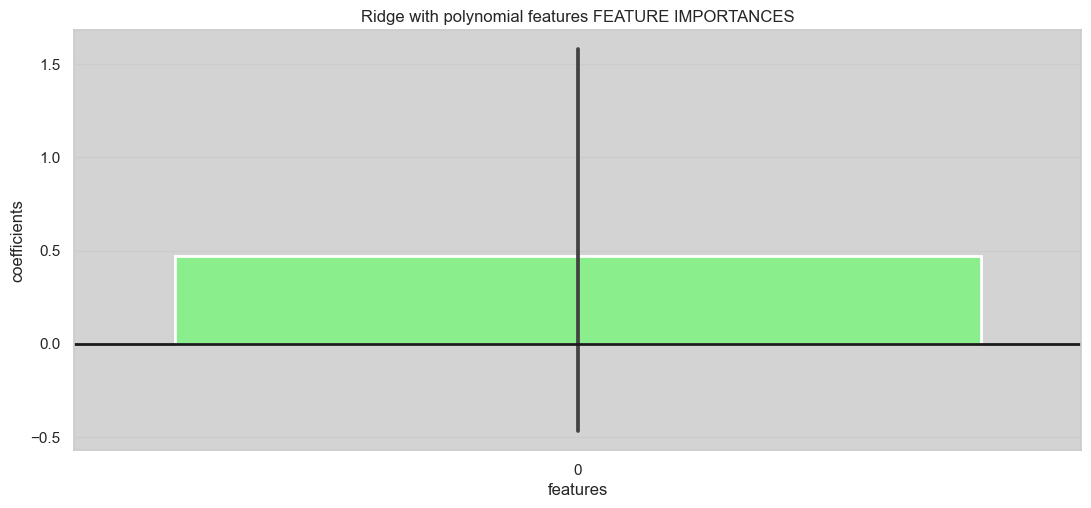

In [51]:
rr = Ridge(random_state = 1)
rr_resultsDf = train_test_model(rr, 'Ridge with polynomial features', X_train_poly_2, X_test_poly_2, y_train, y_test, 'coef', 8, 'no')
resultsDf = pd.concat([resultsDf,rr_resultsDf])
resultsDf

Lasso(random_state=1)
***************************************************************************
The intercept for our model is 36.71626224160949 

The coefficient for 0 is 0.0
The coefficient for 1 is 8.07284239313821
The coefficient for 2 is 3.7446158428703042
The coefficient for 3 is 0.0
The coefficient for 4 is -2.8304706352531297
The coefficient for 5 is 2.073862666873028
The coefficient for 6 is -0.0
The coefficient for 7 is -0.03884259292365193
The coefficient for 8 is 8.661997775217584
The coefficient for 9 is 0.0
The coefficient for 10 is -0.0
The coefficient for 11 is -0.0
The coefficient for 12 is -0.0
The coefficient for 13 is 0.0
The coefficient for 14 is 0.0
The coefficient for 15 is -0.0
The coefficient for 16 is -0.0
The coefficient for 17 is 0.0
The coefficient for 18 is -0.0
The coefficient for 19 is 0.0
The coefficient for 20 is 0.0
The coefficient for 21 is -0.0
The coefficient for 22 is 0.0
The coefficient for 23 is 0.0
The coefficient for 24 is 0.0
The coefficien

,Method,R Squared,RMSE,Train Accuracy,Test Accuracy
1,LinearRegression,0.6773100,8.6594171,0.7351817,0.6773100
1,Ridge,0.8024547,6.7753115,0.8119030,0.8024547
3,Lasso,0.7668032,7.3613450,0.7894170,0.7668032
4,Linear Regression with interaction features,0.8341979,6.2071314,0.8636790,0.8341979
5,Ridge with interaction features,0.8344728,6.2019836,0.8636596,0.8344728
10,Lasso with interaction features,0.7541395,7.5585812,0.7908939,0.7541395
7,Linear Regression with Polynomial features,0.8694832,5.5071775,0.8806901,0.8694832
8,Ridge with polynomial features,0.8448948,6.0035637,0.8804418,0.8448948
9,Lasso with polynomial features,0.7586617,7.4887444,0.7950318,0.7586617


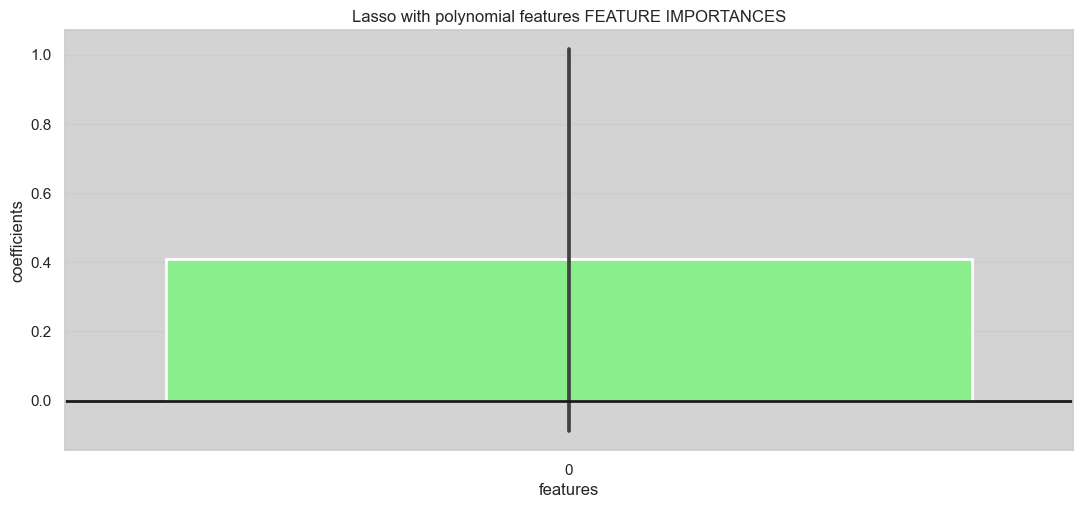

In [52]:
lasso = Lasso(random_state = 1)
lasso_resultsDf = train_test_model(lasso, 'Lasso with polynomial features', X_train_poly_2, X_test_poly_2, y_train, y_test, 'coef', 9, 'no')
resultsDf = pd.concat([resultsDf, lasso_resultsDf])
resultsDf

In [53]:
scale = PowerTransformer()
con_scaled = pd.DataFrame(scale.fit_transform(construction))

In [54]:
cluster_range = range(1, 17)  
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(n_clusters = num_clusters, n_init = 5, random_state = 1)
    clusters.fit(con_scaled)
    
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    
    cluster_errors.append(clusters.inertia_ )

clusters_df = pd.DataFrame({ "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,9045.0000000
1,2,7184.1710349
2,3,6171.5046087
3,4,5406.3104852
4,5,4916.4063781
5,6,4433.3515066
6,7,4089.0709455
7,8,3805.7902271
8,9,3633.1877291
9,10,3438.5080988


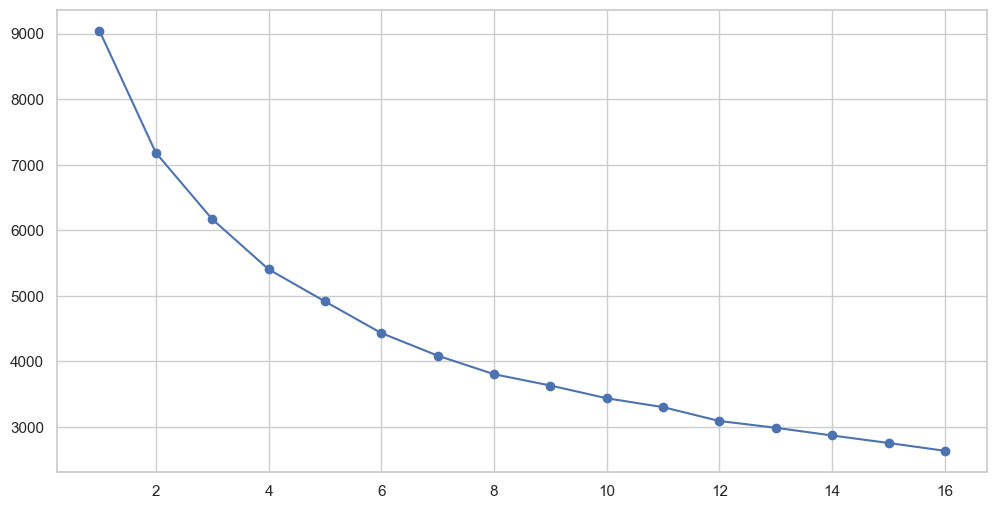

In [55]:
plt.figure(figsize=(12,6))
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [56]:
cluster = KMeans(n_clusters = 6, random_state = None)
cluster.fit(con_scaled)

KMeans(n_clusters=6)

In [ ]:
predict=cluster.predict(con_scaled)
#con_scaled.columns = con_scaled.columns.astype(str) 
con_scaled.columns["GROUP"] = predict

In [58]:
centroids = cluster.cluster_centers_
centroids

array([[-0.543563  ,  0.50266046,  1.04665982,  0.42280315,  0.63175429,
        -1.00764765, -0.33282023, -0.01274438, -0.08165969],
       [ 0.63534171, -1.03762913, -0.92298759,  0.40094659, -1.15666873,
         0.59963923,  0.18228288, -0.17617332, -0.49366773],
       [ 1.01239143,  0.64462996, -0.41546329, -0.96981614,  0.97841556,
        -0.57140501,  0.13619745, -0.07692388,  1.09684202],
       [-1.05888425,  1.12781238, -0.91206971,  0.4424848 , -0.87556594,
         0.04123417,  0.01428466, -0.36220545, -0.79183795],
       [ 0.68287095,  0.36127912, -0.87811063,  1.61265875, -1.14710544,
        -0.20266759, -1.52755566,  1.10463506,  0.68845853],
       [-0.49788956, -0.70084416,  1.08010433, -0.6455165 ,  0.6166365 ,
         0.6187428 ,  0.47157378,  0.01551861, -0.15664726]])

In [59]:
centroid_df = pd.DataFrame(centroids, columns = list(construction))
centroid_df

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,-0.5435630,0.5026605,1.0466598,0.4228031,0.6317543,-1.0076476,-0.3328202,-0.0127444,-0.0816597
1,0.6353417,-1.0376291,-0.9229876,0.4009466,-1.1566687,0.5996392,0.1822829,-0.1761733,-0.4936677
2,1.0123914,0.6446300,-0.4154633,-0.9698161,0.9784156,-0.5714050,0.1361974,-0.0769239,1.0968420
3,-1.0588843,1.1278124,-0.9120697,0.4424848,-0.8755659,0.0412342,0.0142847,-0.3622054,-0.7918380
4,0.6828709,0.3612791,-0.8781106,1.6126587,-1.1471054,-0.2026676,-1.5275557,1.1046351,0.6884585
5,-0.4978896,-0.7008442,1.0801043,-0.6455165,0.6166365,0.6187428,0.4715738,0.0155186,-0.1566473


In [60]:
con_scaled.boxplot(by = 'GROUP',  layout=(3,3), figsize=(15, 10));

KeyError: 'GROUP'

In [61]:
def train_test_transform(X_train, X_test):
    scale = PowerTransformer()
    
    X_train_scaled = pd.DataFrame(scale.fit_transform(X_train))
    X_test_scaled = pd.DataFrame(scale.fit_transform(X_test))
    
    return X_train_scaled, X_test_scaled

In [62]:
error = []

X_train_scaled, X_test_scaled = train_test_transform(X_train, X_test)
for k in range(1,30):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    error.append(np.mean(y_pred != y_test))

Text(0, 0.5, 'Mean error')

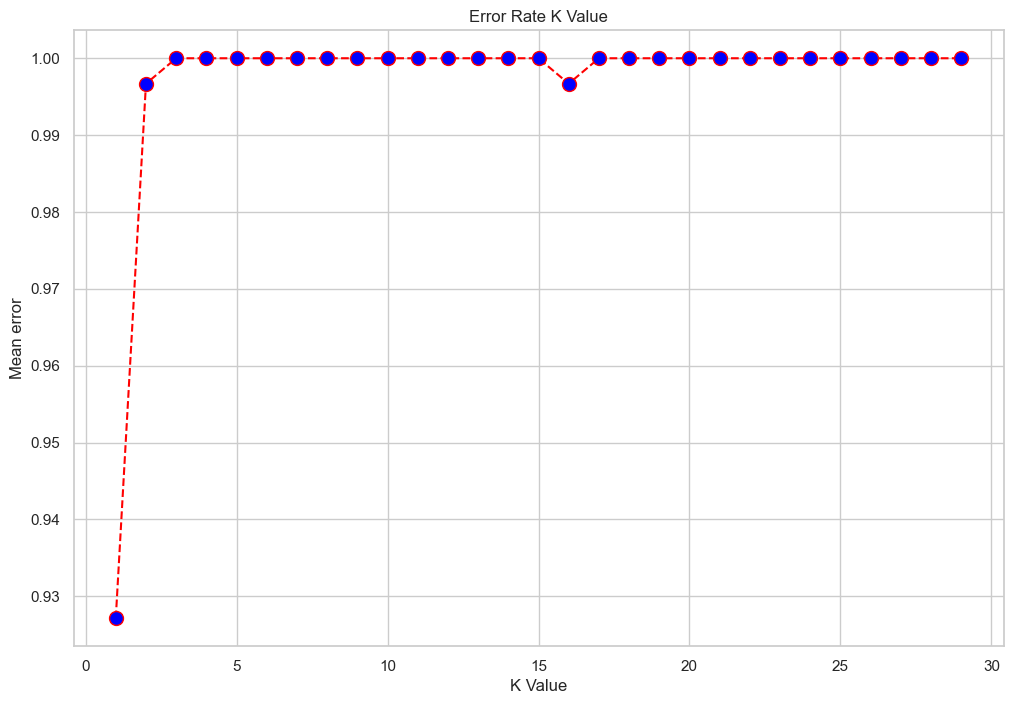

In [63]:
plt.figure(figsize=(12,8))
plt.plot(range(1,30), error, color='red', linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean error')

In [64]:
knn = KNeighborsRegressor(n_neighbors = 2)
knn_resultsDf = train_test_model(knn, 'KNeighborsRegressor', X_train, X_test, y_train, y_test,'none', 10,'yes')
resultsDf = pd.concat([resultsDf, knn_resultsDf])
resultsDf


KNeighborsRegressor(n_neighbors=2)
***************************************************************************


AttributeError: 'KNeighborsRegressor' object has no attribute 'coef_'

SVR(kernel='linear')
***************************************************************************
The intercept for our model is [35.44004005] 

The coefficient for cement is 9.038131107719925
The coefficient for slag is 4.815083991571804
The coefficient for ash is 0.9465262252106914
The coefficient for water is -4.027464765899151
The coefficient for superplastic is 2.2625413108696453
The coefficient for coarseagg is -0.5332208199084678
The coefficient for fineagg is -1.1101549634013352
The coefficient for age is 9.820178934765153
***************************************************************************
[[ 9.03813111  4.81508399  0.94652623 -4.02746477  2.26254131 -0.53322082
  -1.11015496  9.82017893]]
DecisionTreeRegressor(random_state=1)
***************************************************************************


AttributeError: 'DecisionTreeRegressor' object has no attribute 'coef_'

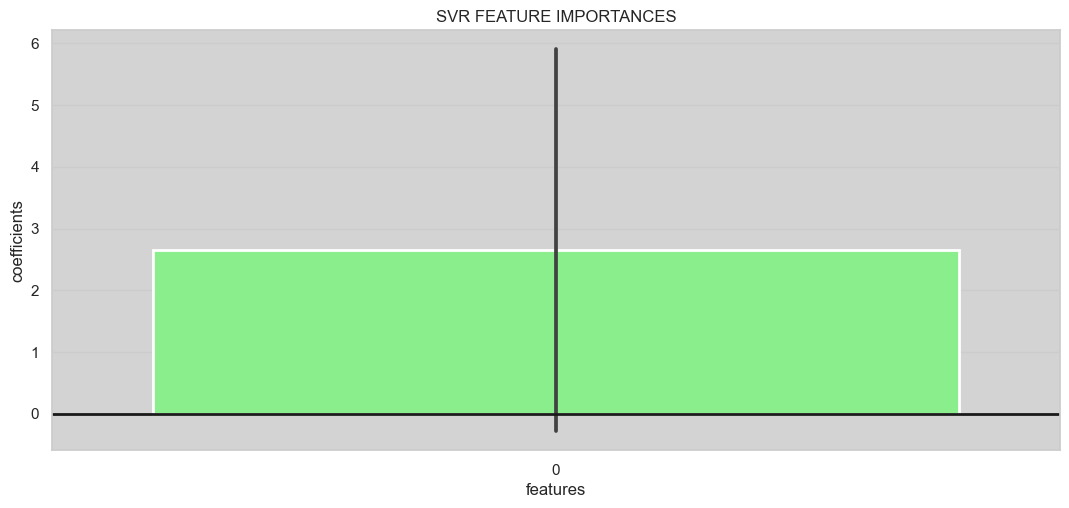

In [65]:
models=[
    ['SVR',SVR(kernel='linear')],
    ['DecisionTreeRegressor', DecisionTreeRegressor(random_state = 1)],
    ['RandomForestRegressor',RandomForestRegressor(random_state = 1)],
    ['BaggingRegressor',BaggingRegressor(random_state = 1)],
    ['ExtraTreesRegressor',ExtraTreesRegressor(random_state = 1)],
    ['AdaBoostRegressor',AdaBoostRegressor(random_state = 1)],
    ['GradientBoostingRegressor',GradientBoostingRegressor(random_state = 1)],
    ['CatBoostRegressor',CatBoostRegressor(random_state = 1, verbose=False)],
    ['XGBRegressor',XGBRegressor()]
]


i = 11
for name, regressor in models:
    if name == 'SVR':
        svr_resultsDf = train_test_model(regressor, name, X_train, X_test, y_train, y_test, 'coef', i, 'yes')
        resultsDf = pd.concat([resultsDf, svr_resultsDf])
    elif name == 'BaggingRegressor':
        bag_resultsDf = train_test_model(regressor, name, X_train, X_test, y_train, y_test, 'none', i, 'yes')
        resultsDf = pd.concat([resultsDf, bag_resultsDf])
    else:
        ensemble_resultsDf = train_test_model(regressor, name, X_train, X_test, y_train, y_test, 'feat', i, 'yes')
        resultsDf = pd.concat([resultsDf, ensemble_resultsDf])
    i = i+1

In [66]:
resultsDf

,Method,R Squared,RMSE,Train Accuracy,Test Accuracy
1,LinearRegression,0.6773100,8.6594171,0.7351817,0.6773100
1,Ridge,0.8024547,6.7753115,0.8119030,0.8024547
3,Lasso,0.7668032,7.3613450,0.7894170,0.7668032
4,Linear Regression with interaction features,0.8341979,6.2071314,0.8636790,0.8341979
5,Ridge with interaction features,0.8344728,6.2019836,0.8636596,0.8344728
10,Lasso with interaction features,0.7541395,7.5585812,0.7908939,0.7541395
7,Linear Regression with Polynomial features,0.8694832,5.5071775,0.8806901,0.8694832
8,Ridge with polynomial features,0.8448948,6.0035637,0.8804418,0.8448948
9,Lasso with polynomial features,0.7586617,7.4887444,0.7950318,0.7586617
11,SVR,0.8003208,6.8118068,0.8096901,0.8003208


In [67]:
sel_ = SelectFromModel(Lasso(random_state = 1))
sel_.fit(X_train, y_train)
sel_.get_support()
lasso_selected_feat = X_train.columns[(sel_.get_support())]
X_train_lasso = X_train[lasso_selected_feat]
X_test_lasso = X_test[lasso_selected_feat]
X_train_lasso.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age'],
      dtype='object')

In [68]:
train_test_allmodels(X_train_lasso, X_test_lasso, y_train, y_test, 'no')

LinearRegression()
***************************************************************************
The coefficient for cement is 0.1198722673040892
The coefficient for slag is 0.09939485229610173
The coefficient for ash is 0.08031641374762029
The coefficient for water is -0.1631540563786189
The coefficient for superplastic is 0.2528111260073266
The coefficient for coarseagg is 0.01009276943772331
The coefficient for fineagg is 0.018080101560133562
The coefficient for age is 0.24465447254599182
***************************************************************************
Ridge(random_state=1)
***************************************************************************
The coefficient for cement is 0.11987230077578724
The coefficient for slag is 0.09939494625209873
The coefficient for ash is 0.08031705723269002
The coefficient for water is -0.16315882834903817
The coefficient for superplastic is 0.2527839164155184
The coefficient for coarseagg is 0.010092032077206704
The coefficient for fineagg

AttributeError: 'KNeighborsRegressor' object has no attribute 'coef_'

In [69]:
sel_ = SelectFromModel(Lasso(random_state = 1))
sel_.fit(X_train_poly_2, y_train)
sel_.get_support()
lasso_poly_selected_feat = X_train_poly_2.columns[(sel_.get_support())]
X_train_lasso_poly = X_train_poly_2[lasso_poly_selected_feat]
X_test_lasso_poly = X_test_poly_2[lasso_poly_selected_feat]
X_train_lasso_poly.columns

Int64Index([1, 2, 4, 5, 7, 8, 26, 44], dtype='int64')

In [70]:
train_test_allmodels(X_train_lasso_poly, X_test_lasso_poly, y_train, y_test, 'no')

LinearRegression()
***************************************************************************
The coefficient for 1 is 8.88987232637062
The coefficient for 2 is 4.513976610958202
The coefficient for 4 is -4.318176369787094
The coefficient for 5 is 1.8387766601513351
The coefficient for 7 is -1.1692357996834637
The coefficient for 8 is 9.697707600436422
The coefficient for 26 is -1.2919650235356088
The coefficient for 44 is -1.2247373557714454
***************************************************************************
Ridge(random_state=1)
***************************************************************************
The coefficient for 1 is 8.870461927650398
The coefficient for 2 is 4.497295622759493
The coefficient for 4 is -4.309077799819191
The coefficient for 5 is 1.8385592437913594
The coefficient for 7 is -1.1752351285009799
The coefficient for 8 is 9.682891997780516
The coefficient for 26 is -1.3061039143103363
The coefficient for 44 is -1.2226789659504171
************************

AttributeError: 'KNeighborsRegressor' object has no attribute 'coef_'

In [71]:
X_feat = construction[['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'age']]
y = construction['strength']
X_train_feat, X_test_feat, y_train, y_test = train_test_split(X_feat, y, test_size = 0.30, random_state = 1)

In [72]:
train_test_allmodels(X_train_feat, X_test_feat, y_train, y_test, 'yes')

LinearRegression()
***************************************************************************
The coefficient for cement is 9.991577424442886
The coefficient for slag is 5.828004300644607
The coefficient for ash is 1.255363302935889
The coefficient for water is -3.8881923557098848
The coefficient for superplastic is 2.0608243816130085
The coefficient for coarseagg is 0.1993418544820472
The coefficient for age is 9.802736375087344
***************************************************************************
Ridge(random_state=1)
***************************************************************************
The coefficient for cement is 9.964305716476312
The coefficient for slag is 5.803241912618206
The coefficient for ash is 1.2310587557459365
The coefficient for water is -3.8774722053630466
The coefficient for superplastic is 2.078617102139016
The coefficient for coarseagg is 0.1935916025220949
The coefficient for age is 9.78782757204642
****************************************************

AttributeError: 'KNeighborsRegressor' object has no attribute 'coef_'

Linear regression - Test accuracy = 79.50% with RMSE = 6.90
Ridge regression - Test accuracy = 79.49% with RMSE = 6.90
SVR - Test accuracy = 79.34% with RMSE = 6.92
Rest all models performs better on training set and poorly on test set which shows that it's an overfitting and very complex models.

In [73]:
#Hyper Parameter Tuning:Ridge and SVR models - Hyperparameter tuning with original features


models=[['Ridge',Ridge()], ['SVR',SVR()]]
ridge_param_grid = {'alpha': [1,0.1,0.01,0.001,0.0001,0]}
lasso_param_grid = {'alpha': [0.02, 0.024, 0.025, 0.026, 0.03]}
knn_param_grid = {'n_neighbors': range(3, 21, 2),
                 'weights': ['uniform', 'distance'],
                 'metric': ['euclidean', 'manhattan', 'minkowski']}
svr_param_grid = {'kernel': ['poly', 'rbf', 'sigmoid'],
                 'C': [50, 10, 1.0, 0.1, 0.01],
                 'gamma': ['scale']}
rf_param_grid = {'n_estimators': [10, 100, 1000],
                 'max_features': ['auto', 'sqrt', 'log2']}
bag_param_grid = {'n_estimators': [10, 100, 1000],
                 'max_samples': np.arange(0.7, 0.8, 0.05)}
et_param_grid = {'n_estimators': np.arange(10,100,10),
                 'max_features': ['auto', 'sqrt', 'log2'],
                 'min_samples_split': np.arange(2,15,1)}
adb_param_grid = {'n_estimators': np.arange(30,100,10),
                 'learning_rate': np.arange(0.1,1,0.5)}
gb_param_grid = {'n_estimators': np.arange(30,100,10),
                 'learning_rate': np.arange(0.1,1,0.5)}
catb_param_grid = {'depth': [4, 7, 10],
                  'learning_rate' : [0.03, 0.1, 0.15],
                  'l2_leaf_reg': [1,4,9],
                  'iterations': [300]}
xgb_param_grid = {'learning_rate': [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ],
                  'max_depth' : [ 3, 4, 5, 6, 8, 10, 12, 15],
                  'min_child_weight': [ 1, 3, 5, 7],
                  'gamma': [0.0, 0.1, 0.2 , 0.3, 0.4],
                  'colsample_bytree': [ 0.3, 0.4, 0.5 , 0.7]}


for name, regressor in models:
    if name == 'Ridge':
        ridge_best_estimator = hyperparameterstune_model(name, regressor, X_train, y_train, ridge_param_grid)
    elif name == 'Lasso':
        lasso_best_estimator = hyperparameterstune_model(name, regressor, X_train, y_train, lasso_param_grid)
    elif name == 'KNeighborsRegressor':
        knn_best_estimator = hyperparameterstune_model(name, regressor, X_train, y_train, knn_param_grid)
    elif name == 'SVR':
        svr_best_estimator = hyperparameterstune_model(name, regressor, X_train, y_train, svr_param_grid)
    elif name == 'RandomForestRegressor':
        rf_best_estimator = hyperparameterstune_model(name, regressor, X_train, y_train, rf_param_grid)
    elif name == 'BaggingRegressor':
        bag_best_estimator = hyperparameterstune_model(name, regressor, X_train, y_train, bag_param_grid)
    elif name == 'ExtraTreesRegressor':
        et_best_estimator = hyperparameterstune_model(name, regressor, X_train, y_train, et_param_grid)
    elif name == 'AdaBoostRegressor':
        adb_best_estimator = hyperparameterstune_model(name, regressor, X_train, y_train, adb_param_grid)
    elif name == 'GradientBoostingRegressor':
        gb_best_estimator = hyperparameterstune_model(name, regressor, X_train, y_train, gb_param_grid)
    elif name == 'CatBoostRegressor':
        catb_best_estimator = hyperparameterstune_model(name, regressor, X_train, y_train, catb_param_grid)
    elif name == 'XGBRegressor':
        xgb_best_estimator = hyperparameterstune_model(name, regressor, X_train, y_train, xgb_param_grid)

ValueError: Setting a random_state has no effect since shuffle is False. You should leave random_state to its default (None), or set shuffle=True.

In [74]:
con_scaled.drop(columns=['GROUP'], axis=1, inplace=True)

KeyError: "['GROUP'] not found in axis"

In [ ]:
values = con_scaled.values
n_iterations = 1000        
n_size = int(len(con_scaled) * 1)    
gbm_stats = list()   
for i in range(n_iterations):
    train = resample(values, n_samples=n_size)  
    test = np.array([x for x in values if x.tolist() not in train.tolist()]) 
    gbmTree = GradientBoostingRegressor(n_estimators=50)
    gbmTree.fit(train[:,:-1], train[:,-1]) 
    y_bs_test = test[:,-1]  
    score = gbmTree.score(test[:, :-1] , y_bs_test)
    predictions = gbmTree.predict(test[:, :-1])  

    gbm_stats.append(score)

In [ ]:
plt.hist(gbm_stats)
plt.show()
alpha = 0.95                           
p = ((1.0-alpha)/2.0) * 100          
lower = max(0.0, np.percentile(gbm_stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(gbm_stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

In [ ]:
values = con_scaled.values
n_iterations = 1000        
n_size = int(len(con_scaled) * 1)    
rf_stats = list()   
for i in range(n_iterations):
    train = resample(values, n_samples=n_size) 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])
    rfTree = RandomForestRegressor(n_estimators=100)
    rfTree.fit(train[:,:-1], train[:,-1]) 
    y_bs_test = test[:,-1]  
    score = rfTree.score(test[:, :-1] , y_bs_test)
    predictions = rfTree.predict(test[:, :-1]) 
    rf_stats.append(score)

In [ ]:
plt.hist(rf_stats)
plt.show()


alpha = 0.95                             
p = ((1.0-alpha)/2.0) * 100             
lower = max(0.0, np.percentile(rf_stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(rf_stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))
